In [1]:
import keras

Using TensorFlow backend.


# 如果本次backend要改变theano

- import os
- os.environ['KERAS_BACKEND']='theano'
- import keras

# 回归测试

In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

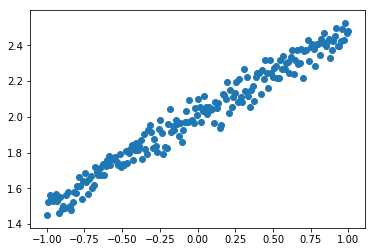

In [3]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()


In [4]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

In [5]:
# build a neural network from the 1st layer to the last layer
model = Sequential()#sequential模式就是一层一层增加

model.add(Dense(units=1, input_dim=1)) 
#model.add增加神经网络层，如再次输入
# model.add(Dense(output_dim=1,))输入output_dim=1
#dense是全连接层，参数output_dim 是输出的维度数；iput_dim输入的维度数

# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')
#model.compile是如何搭建模型，loss定义loss类型，optimizer优化器

In [6]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)#Model train_on_batch就是一批一批的进行train
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  4.0225005
train cost:  0.07323862
train cost:  0.00386274
train cost:  0.0026434488


In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)#评估一下test集的成功
print('test cost:', cost)
W, b = model.layers[0].get_weights()
#model.layers[0]选择第一层神经网络的返回的W，b，get_weights()返回参数
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 236us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


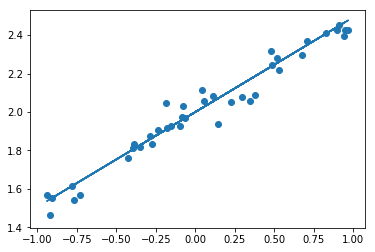

In [8]:
# plotting the prediction
Y_pred = model.predict(X_test)#这里应该是预测集，但是练习期间就用X_test
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

# classifier

In [9]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

In [10]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 20s 2us/step


In [11]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10) #onehot encoding 
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [12]:
# Another way to build your neural net
model = Sequential([
    Dense(32, input_dim=28*28),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
#两层神经网络

In [13]:
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [14]:
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#metrics 在梯度更新的时候同时计算准确率

In [15]:
print('Training ------------')
# Another way to train the model，fit
model.fit(X_train, y_train, epochs=2, batch_size=32)
#epochs=2是训练2次

Training ------------
Epoch 1/2
60000/60000 [==============================] - 2s 39us/step - loss: 0.3434 - acc: 0.9045
Epoch 2/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.1947 - acc: 0.9439


In [16]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)


Testing ------------
10000/10000 [==============================] - 0s 23us/step


In [17]:
print('test loss: ', loss)
print('test accuracy: ', accuracy)

test loss:  0.1737319820895791
test accuracy:  0.9507


# CNN

In [18]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [19]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, 1,28, 28)/255. #-1是sample个数，1是channel个数，28*28是长和宽
X_test = X_test.reshape(-1, 1,28, 28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [20]:
# Another way to build your CNN
model = Sequential()

In [21]:
# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))
#filters 录波器32个高度
model.add(Activation('relu'))


In [22]:
# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

In [23]:
# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

In [24]:
# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

In [25]:
# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=1, batch_size=64,)


Training ------------
Epoch 1/1
60000/60000 [==============================] - 239s 4ms/step - loss: 0.2704 - acc: 0.9264


In [29]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)



Testing ------------
10000/10000 [==============================] - 17s 2ms/step


In [30]:
print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


test loss:  0.10005675589442253

test accuracy:  0.9689


# RNN classifier

In [31]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

In [32]:
TIME_STEPS = 28     # same as the height of the image
INPUT_SIZE = 28     # same as the width of the image
BATCH_SIZE = 50
BATCH_INDEX = 0
OUTPUT_SIZE = 10
CELL_SIZE = 50
LR = 0.001

In [33]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, 28, 28) / 255.      # normalize
X_test = X_test.reshape(-1, 28, 28) / 255.        # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [34]:
# build RNN model
model = Sequential()


In [35]:
# RNN cell
model.add(SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    unroll=True,
))


/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(batch_input_shape=(None, 28,..., unroll=True, units=50)`
  import sys


In [36]:
# output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))


In [37]:
# optimizer
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# training
for step in range(4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], verbose=False)
        print('test cost: ', cost, 'test accuracy: ', accuracy)


test cost:  2.405735731124878 test accuracy:  0.03909999877214432
test cost:  0.6087212562561035 test accuracy:  0.8181999921798706
test cost:  0.4422358274459839 test accuracy:  0.8665000200271606
test cost:  0.3517664074897766 test accuracy:  0.8932999968528748
test cost:  0.33454614877700806 test accuracy:  0.9002000093460083
test cost:  0.28774312138557434 test accuracy:  0.9154999852180481
test cost:  0.26836103200912476 test accuracy:  0.9247000217437744
test cost:  0.2414027899503708 test accuracy:  0.9280999898910522
test cost:  0.21784111857414246 test accuracy:  0.9372000098228455


# LSTM Regressor

In [39]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

BATCH_START = 0
TIME_STEPS = 20 #取20步
BATCH_SIZE = 50
INPUT_SIZE = 1 #输入的值
OUTPUT_SIZE = 1 #输出预测的值
CELL_SIZE = 20
LR = 0.006

In [40]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [41]:
model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))
#stateful true就是批次之间是否有联系。例如本批次最后一步第20步和下一个批次第一步，即第21步是否有联系
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE))) #需要对每一步进行全连接所以需要用到TimeDistributed
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  import sys


Training ------------


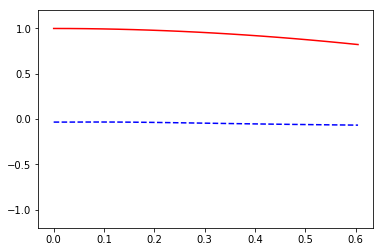

train cost:  0.50940645


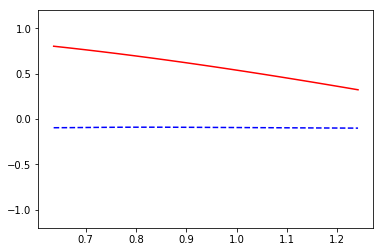

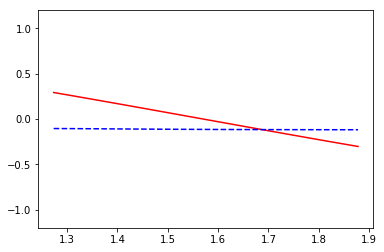

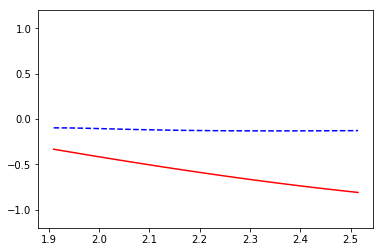

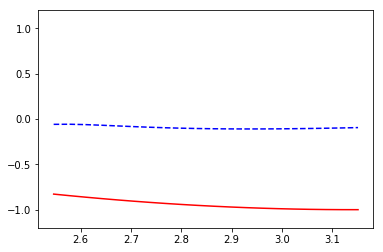

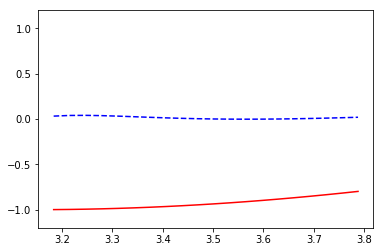

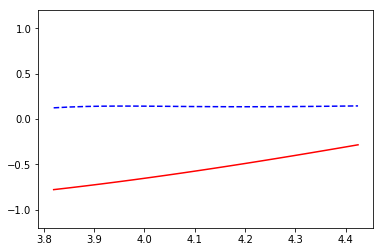

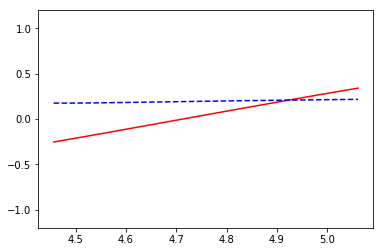

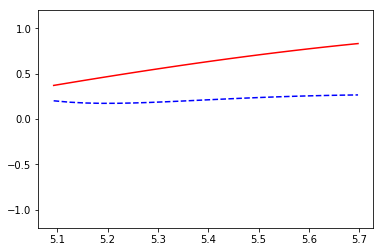

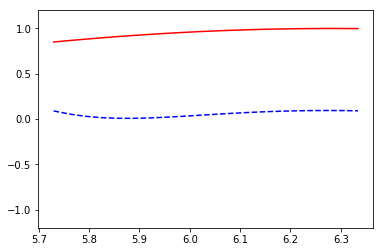

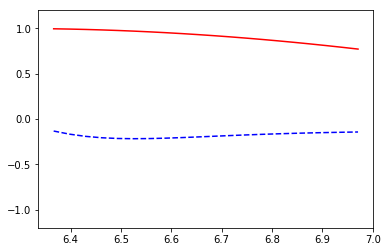

train cost:  0.36718282


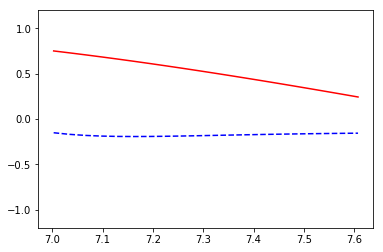

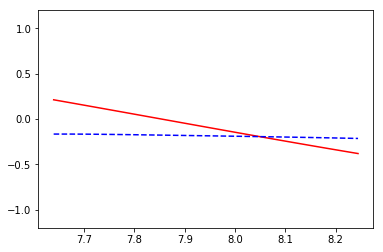

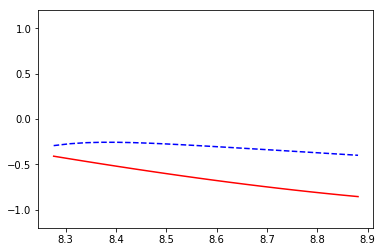

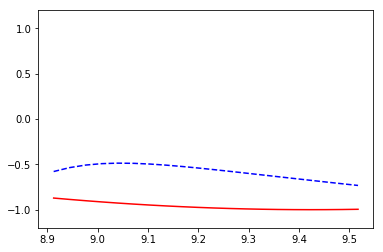

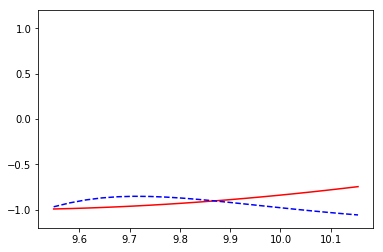

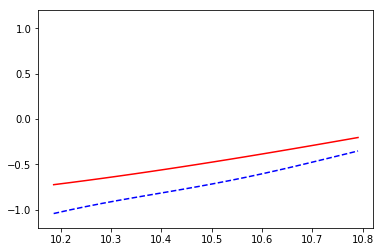

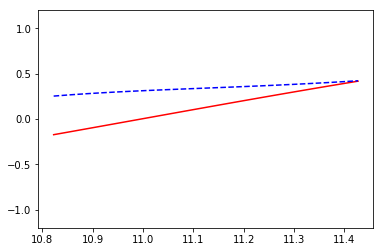

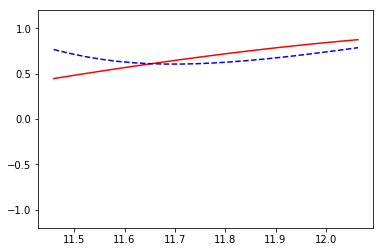

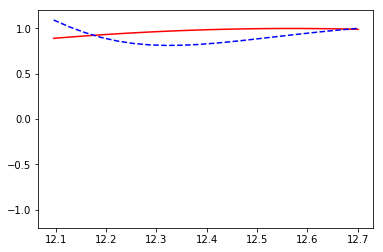

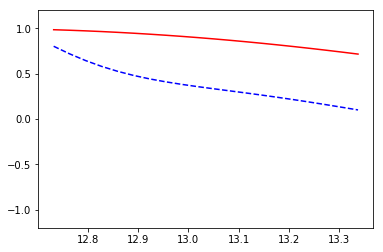

train cost:  0.061026454


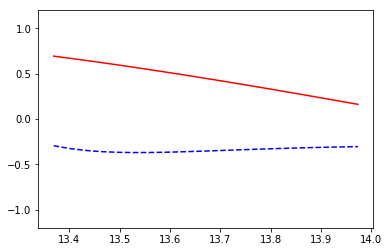

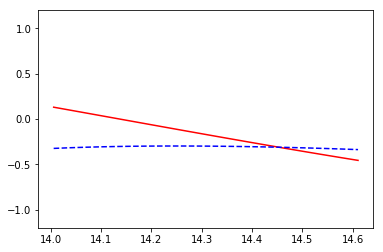

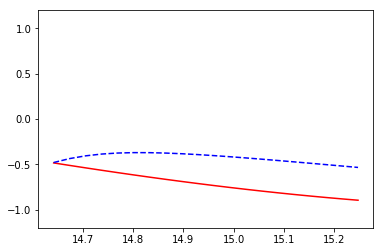

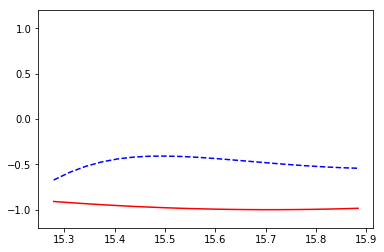

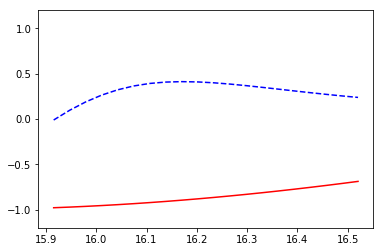

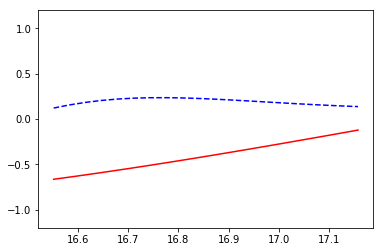

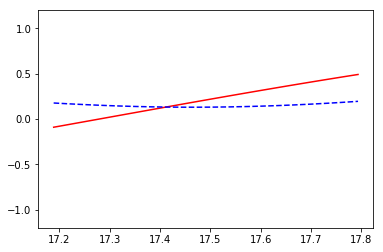

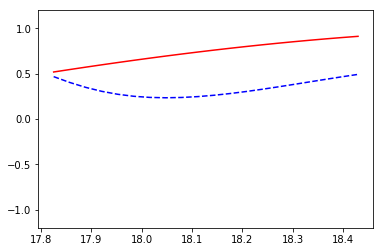

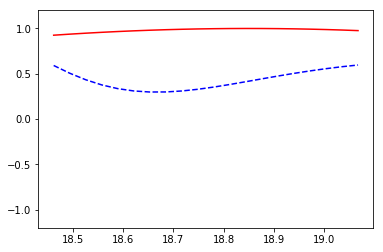

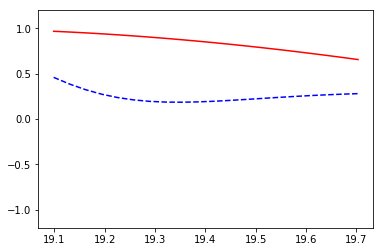

train cost:  0.11499546


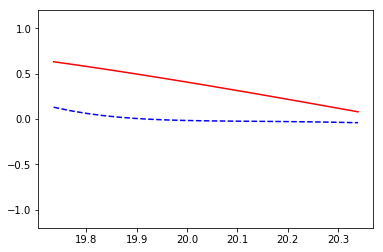

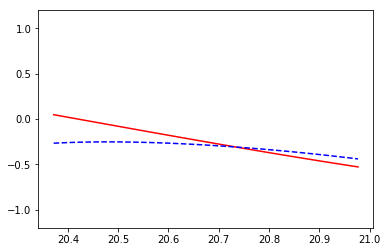

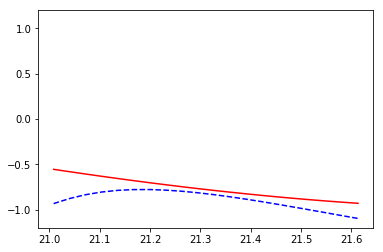

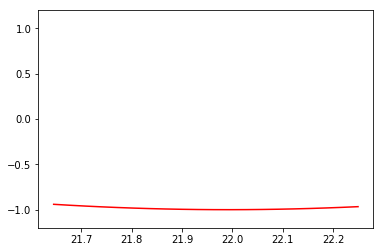

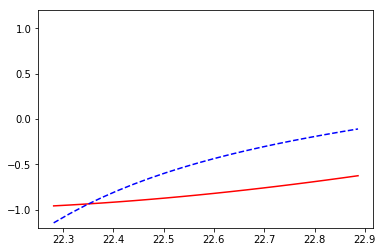

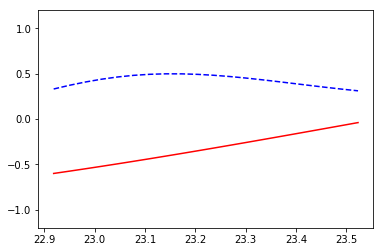

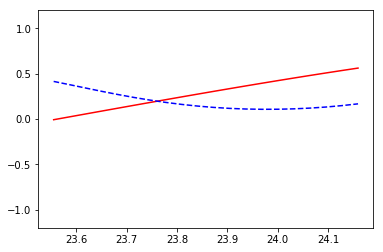

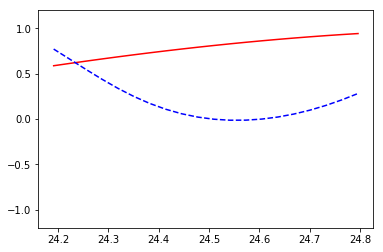

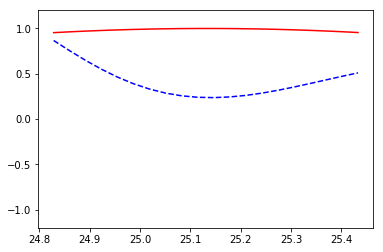

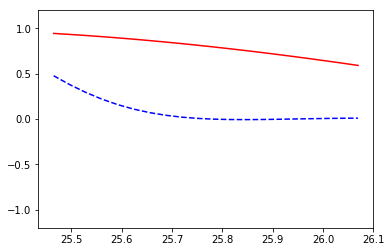

train cost:  0.08321939


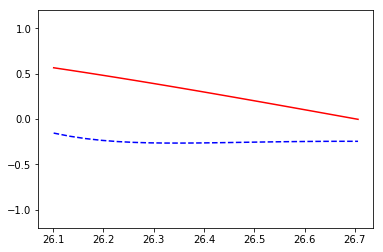

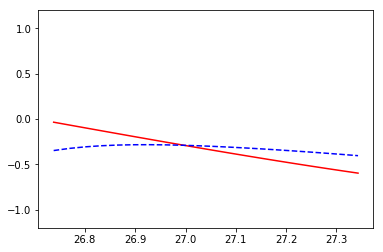

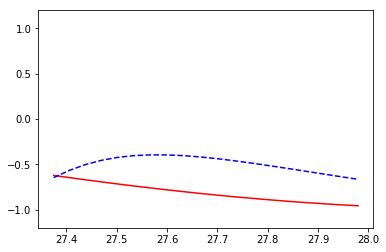

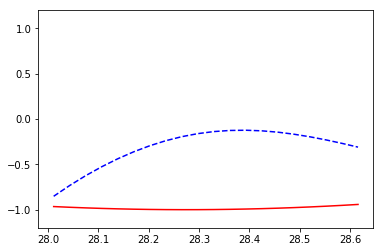

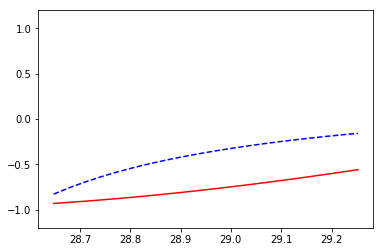

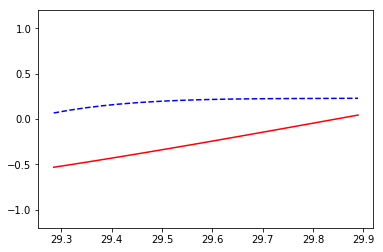

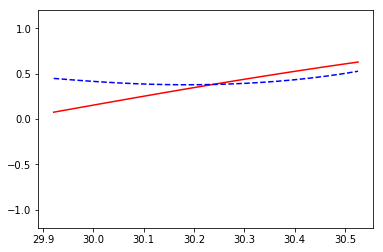

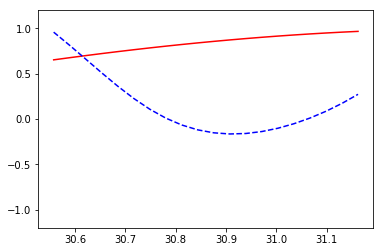

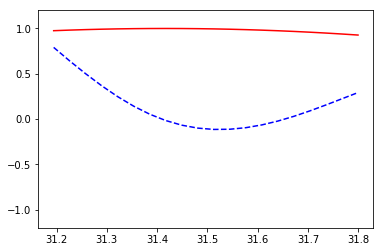

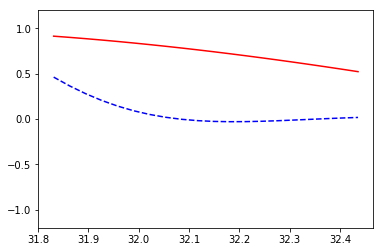

train cost:  0.085846595


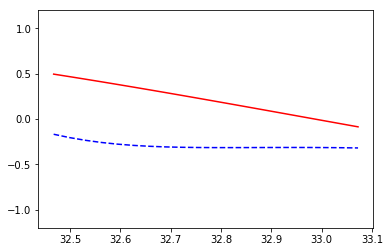

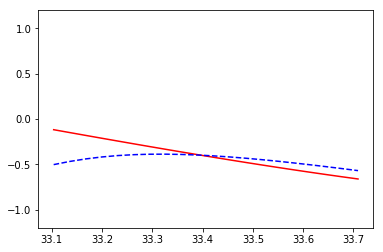

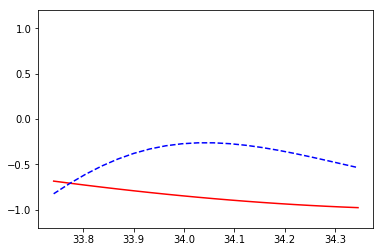

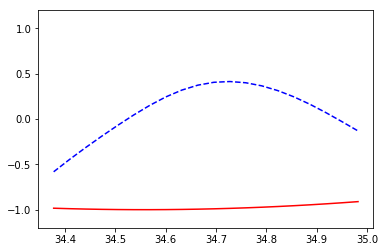

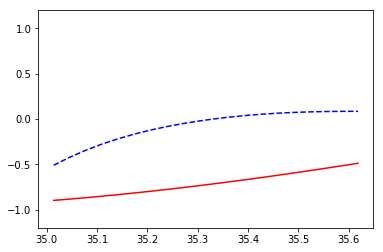

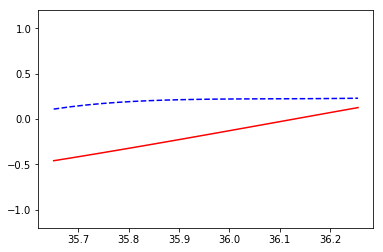

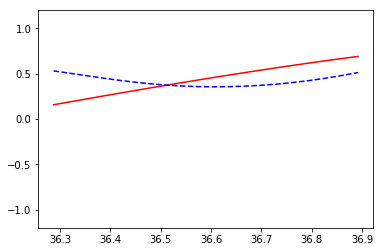

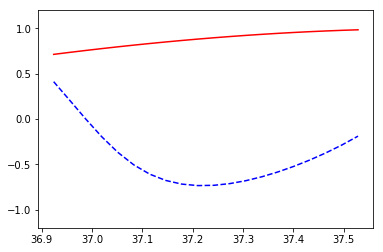

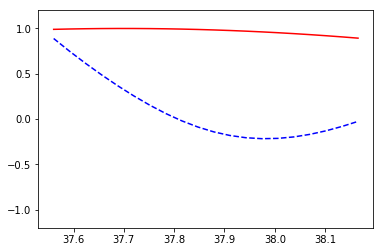

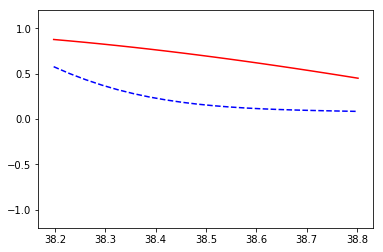

train cost:  0.0915445


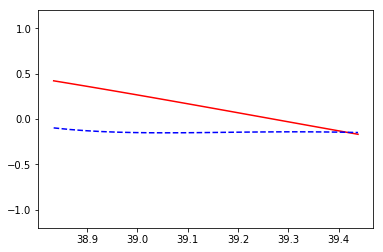

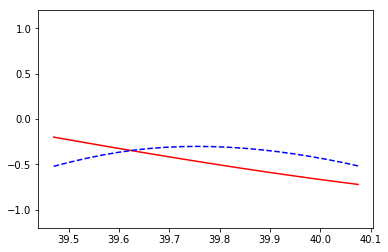

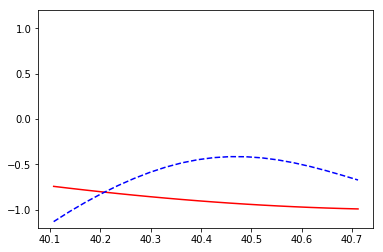

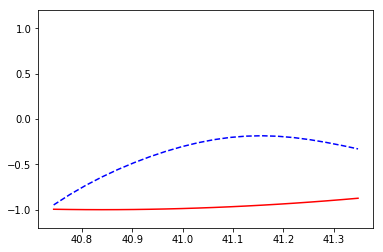

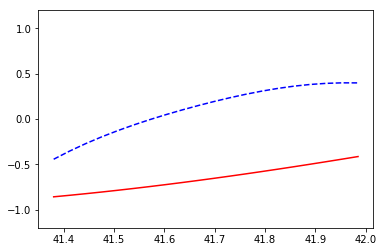

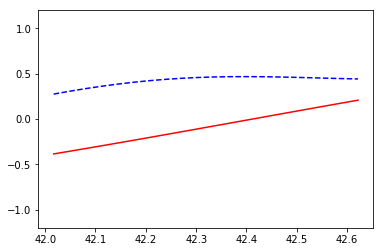

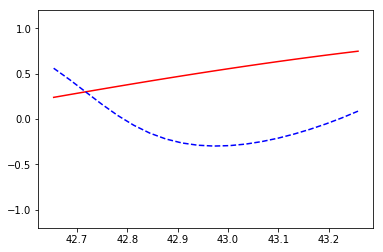

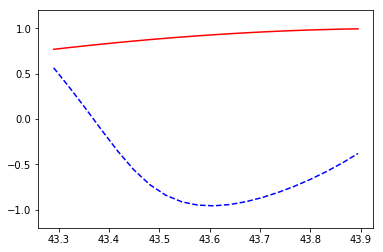

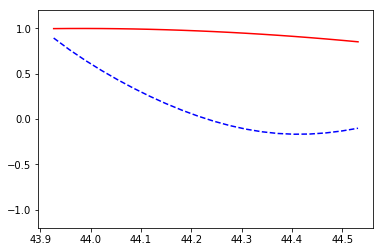

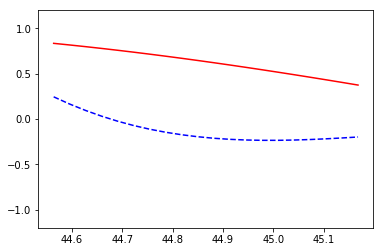

train cost:  0.087638944


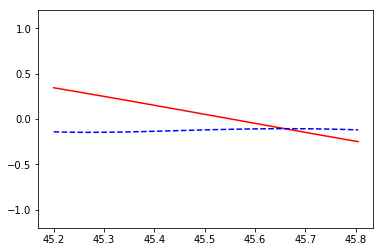

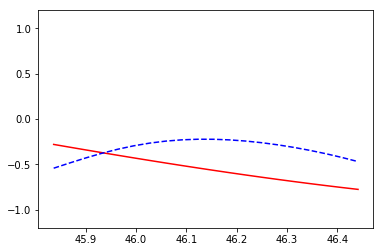

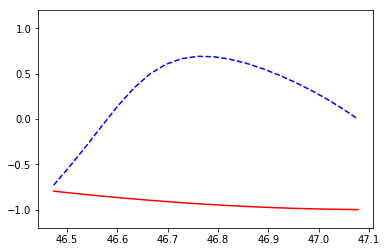

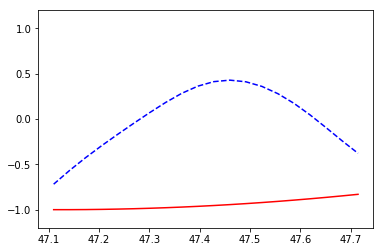

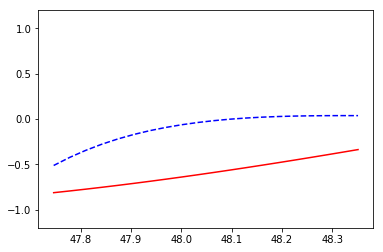

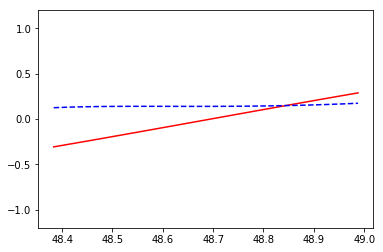

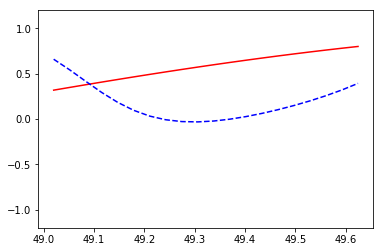

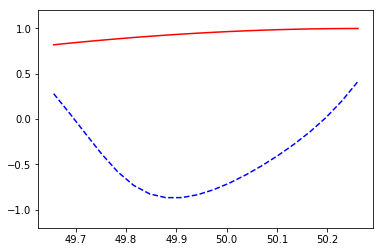

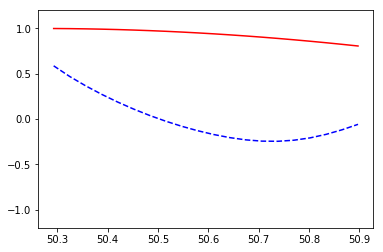

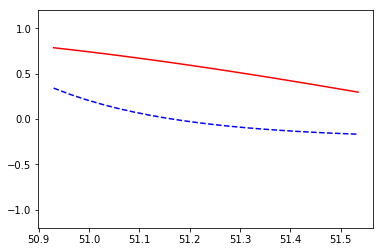

train cost:  0.051357064


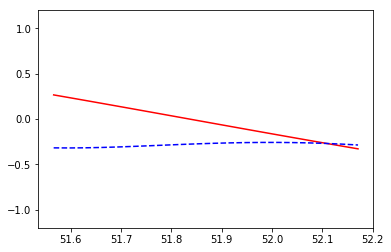

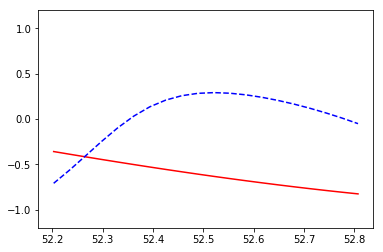

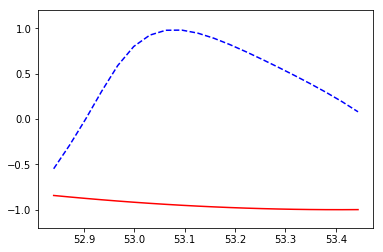

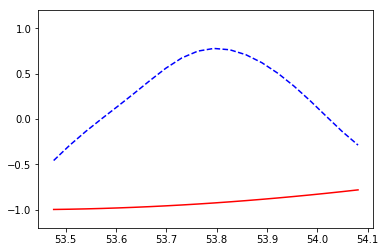

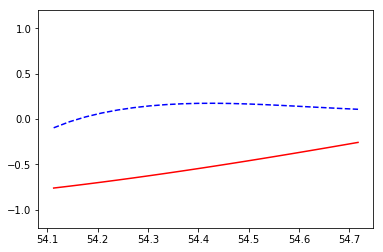

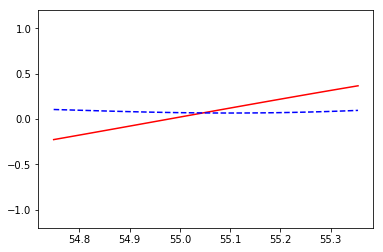

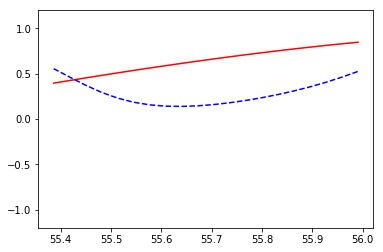

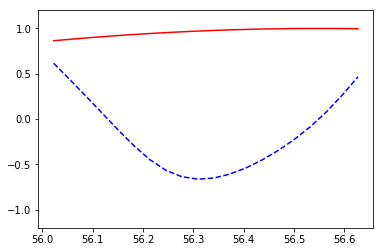

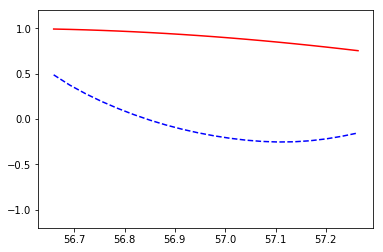

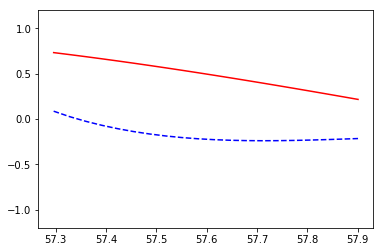

train cost:  0.0548595


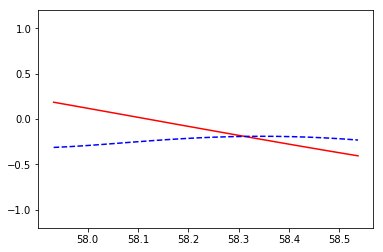

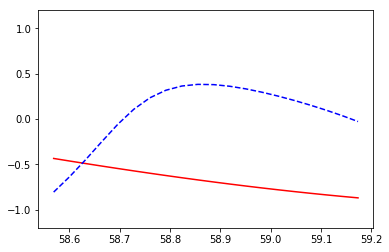

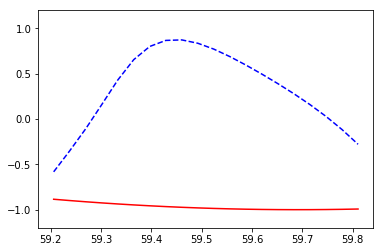

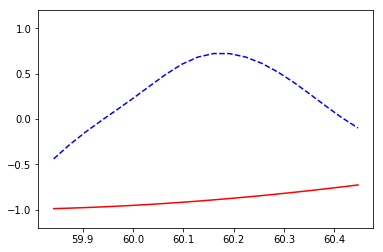

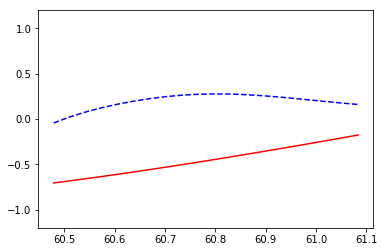

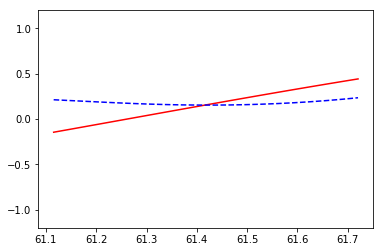

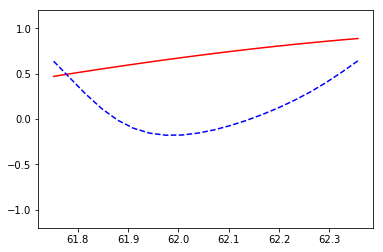

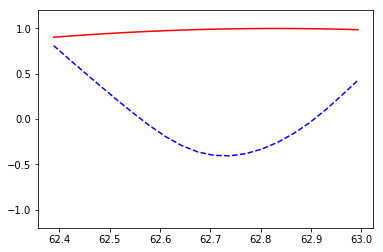

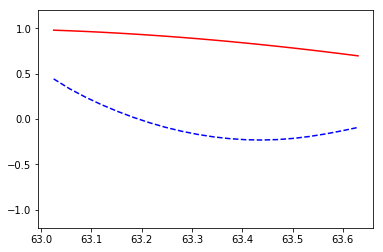

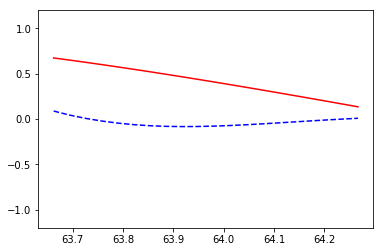

train cost:  0.049276844


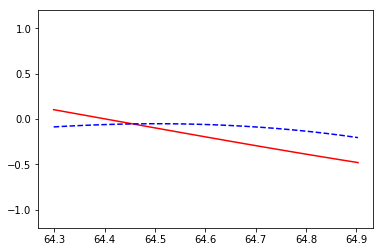

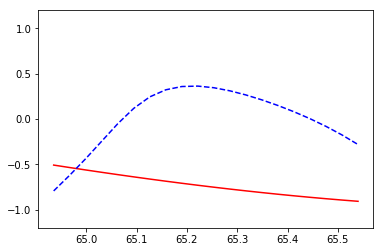

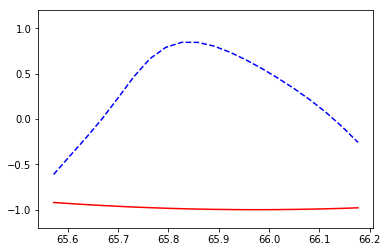

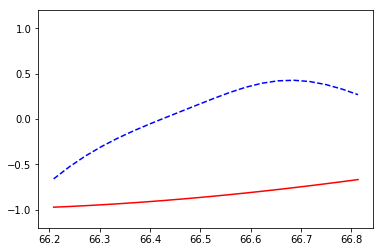

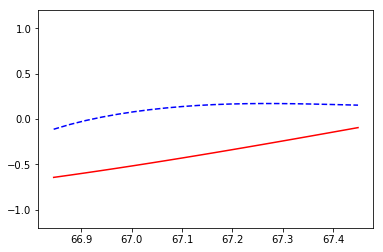

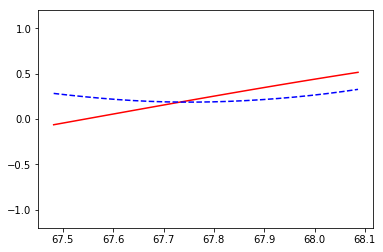

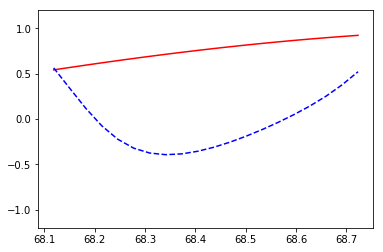

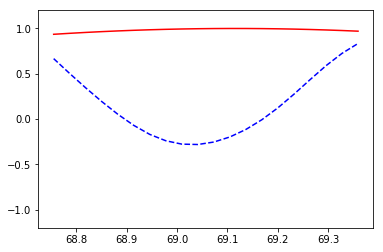

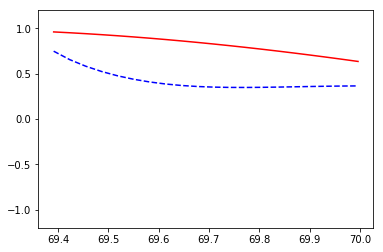

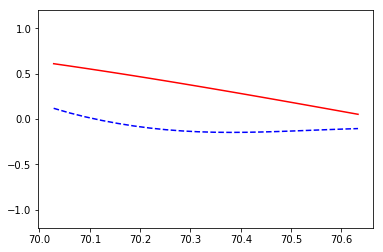

train cost:  0.045080848


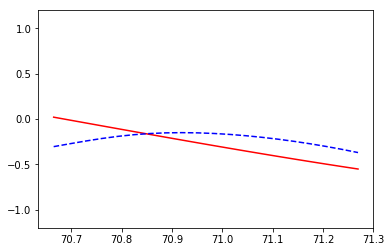

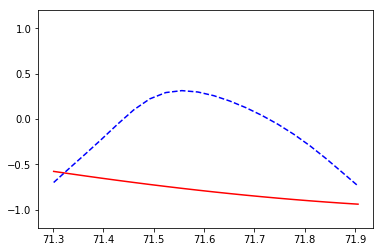

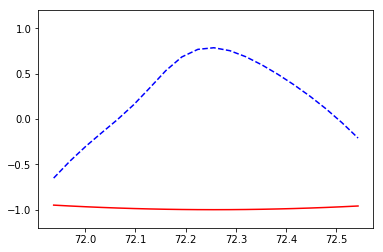

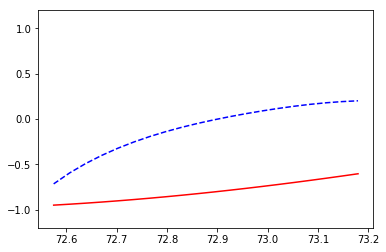

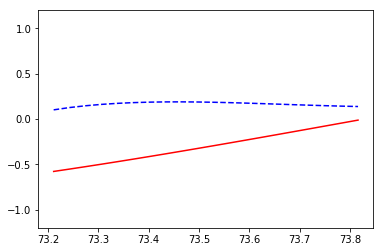

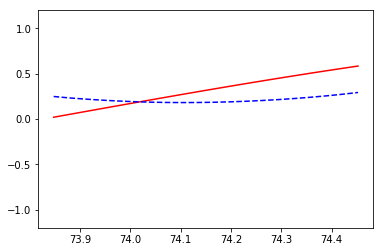

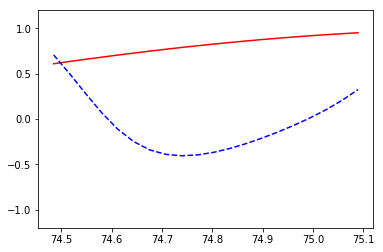

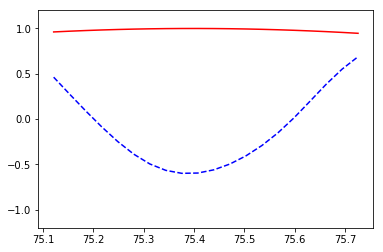

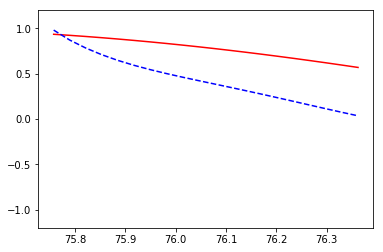

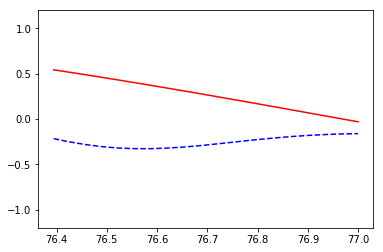

train cost:  0.054131366


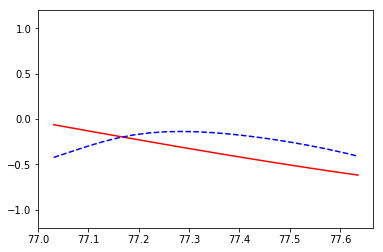

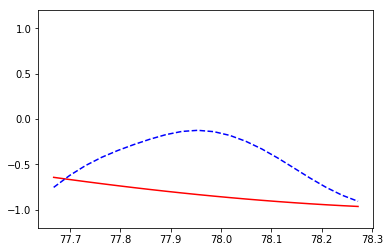

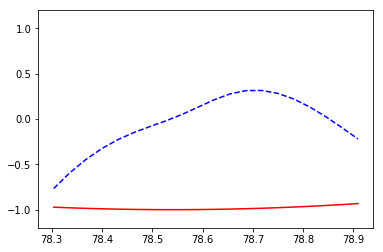

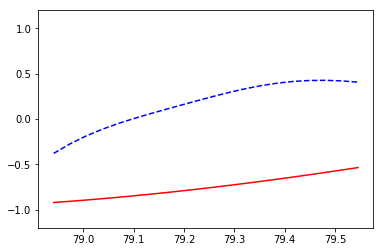

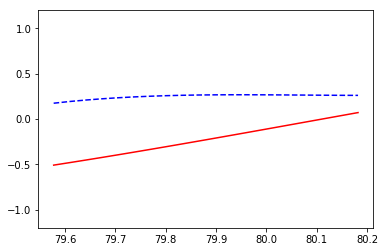

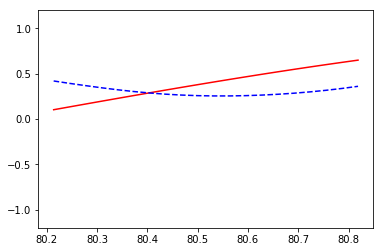

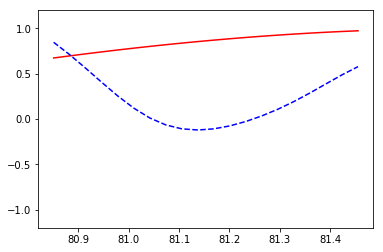

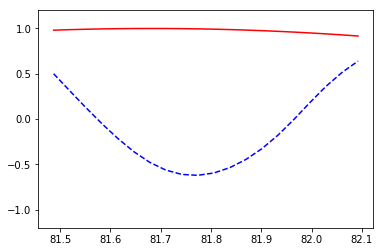

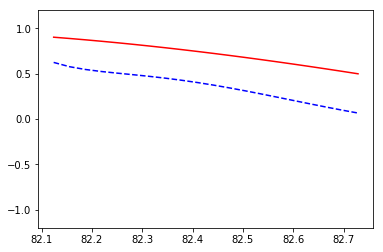

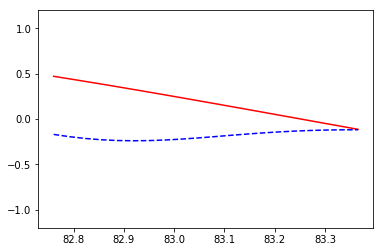

train cost:  0.05587939


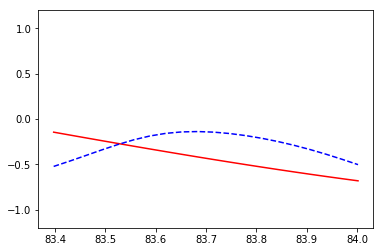

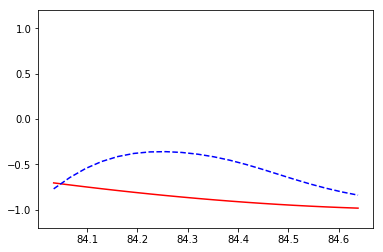

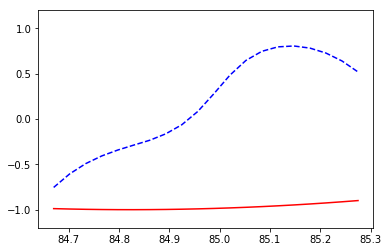

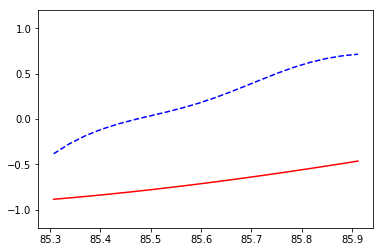

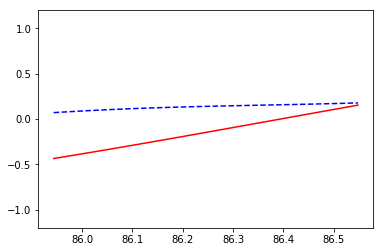

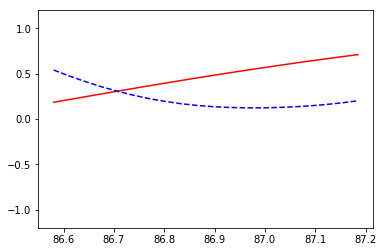

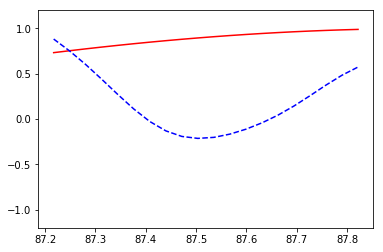

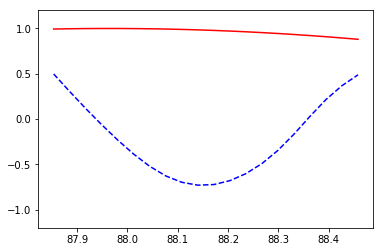

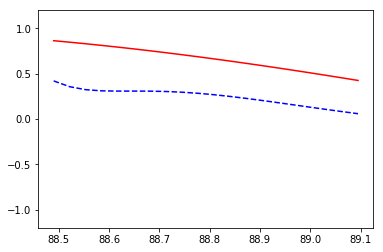

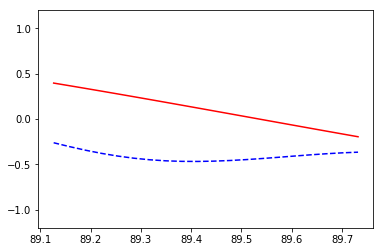

train cost:  0.082164556


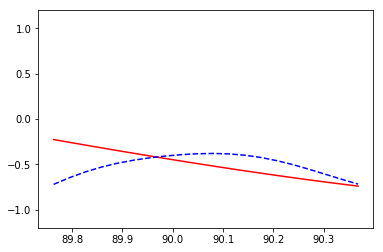

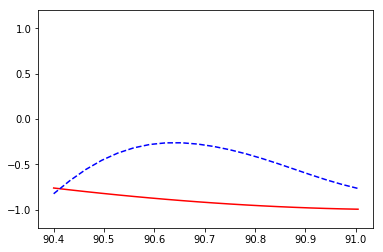

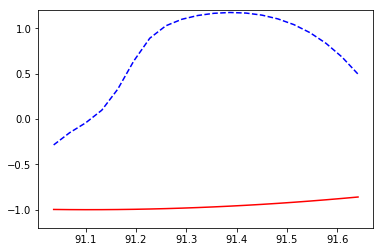

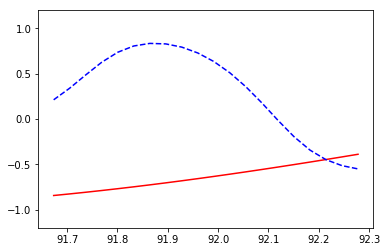

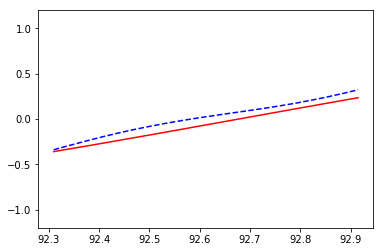

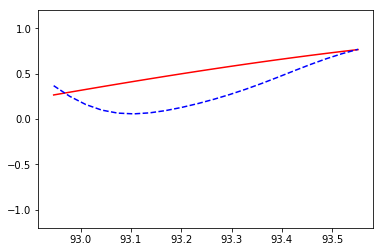

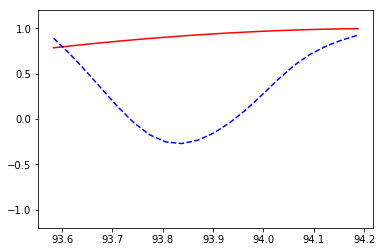

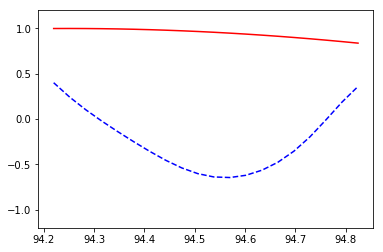

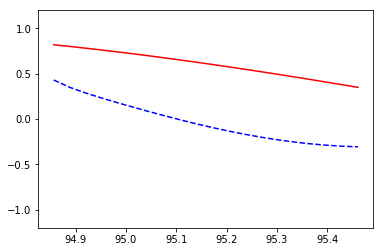

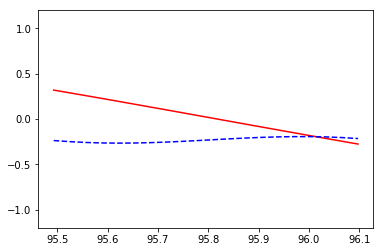

train cost:  0.065638356


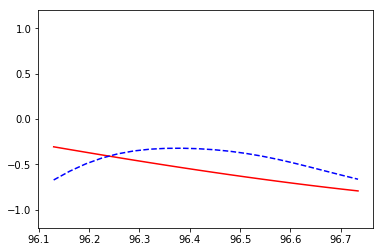

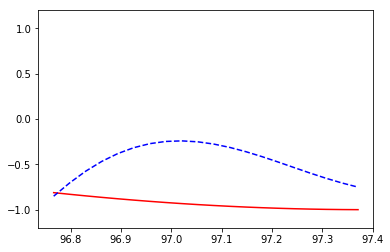

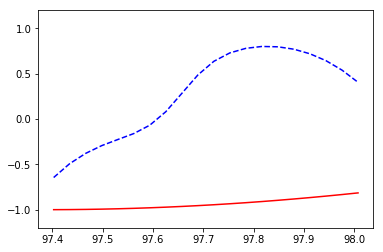

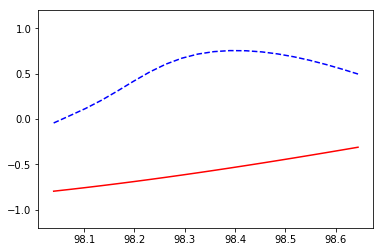

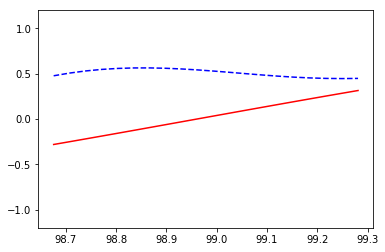

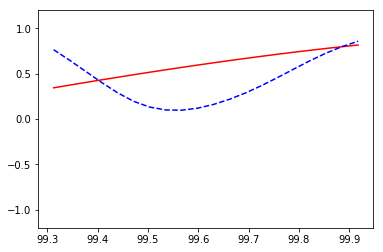

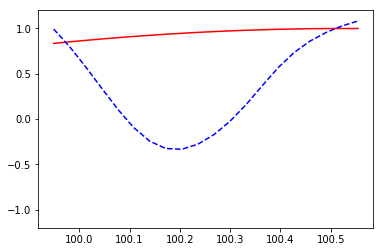

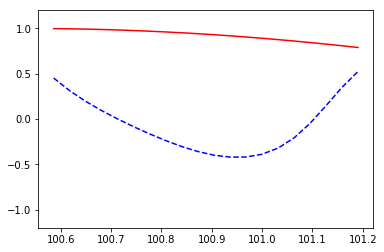

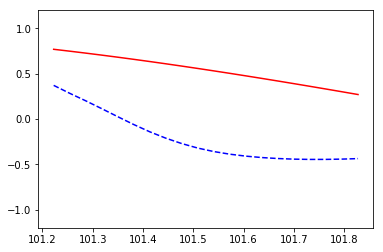

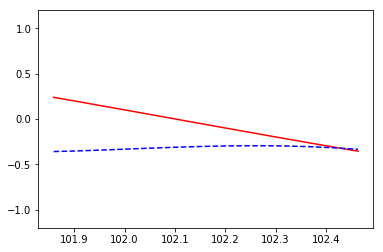

train cost:  0.06458973


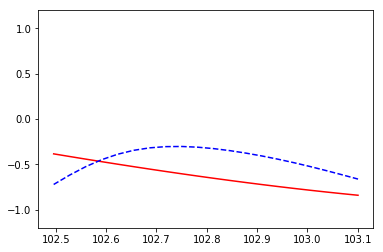

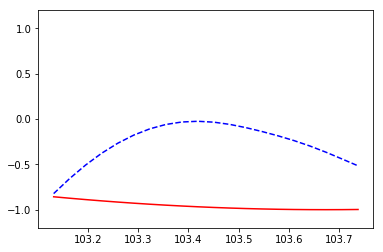

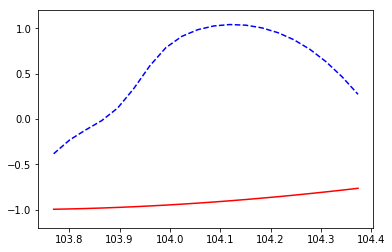

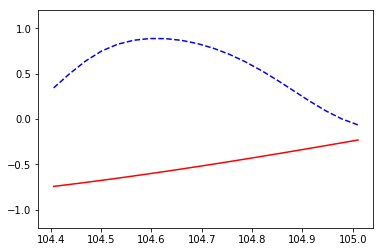

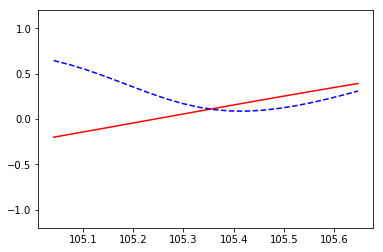

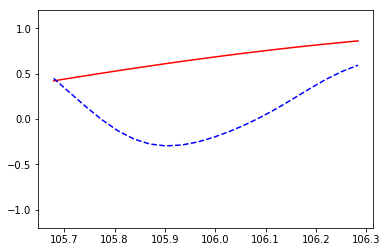

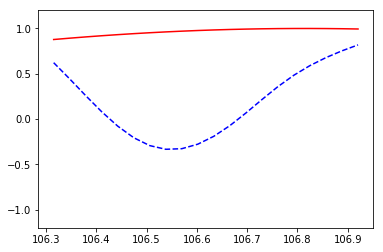

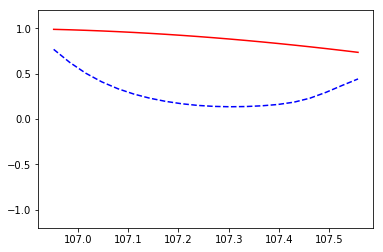

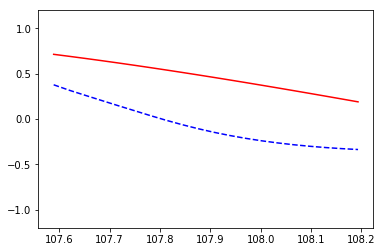

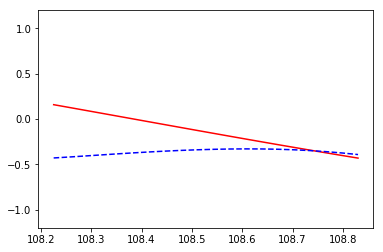

train cost:  0.055875625


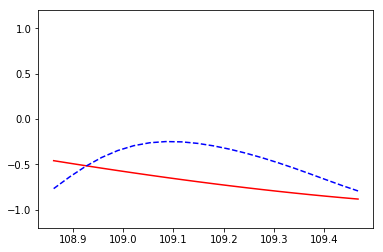

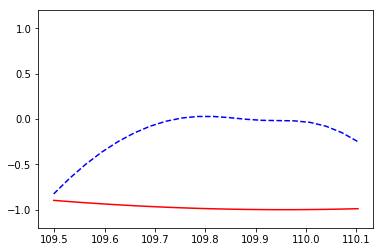

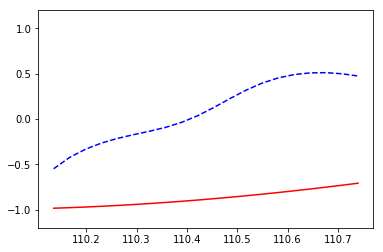

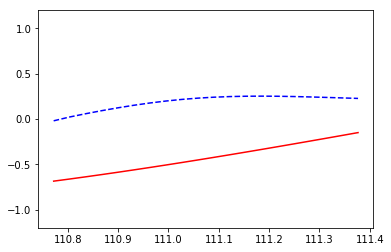

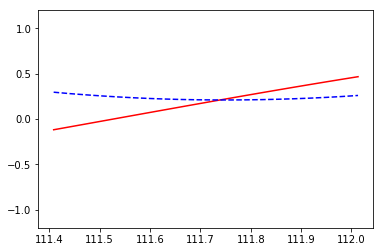

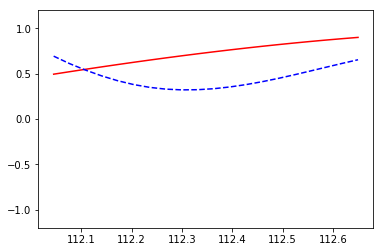

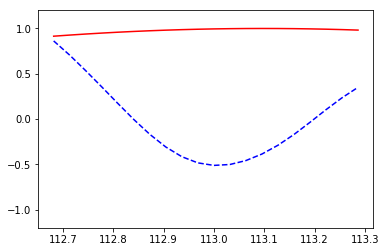

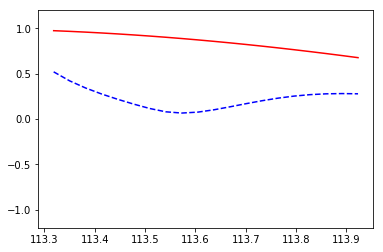

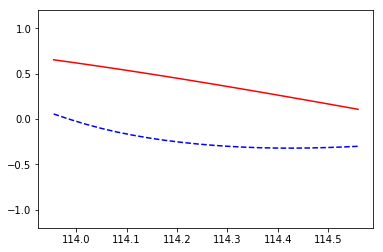

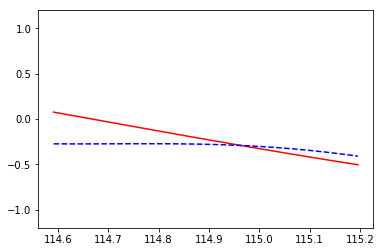

train cost:  0.08401499


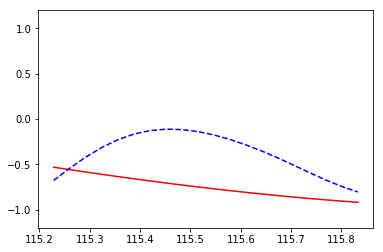

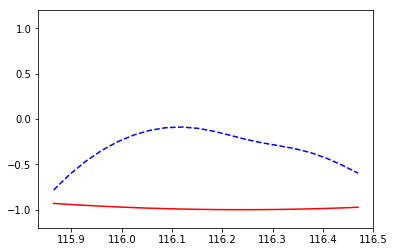

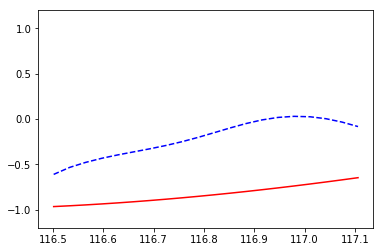

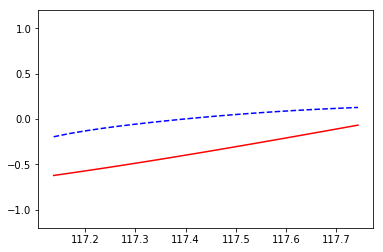

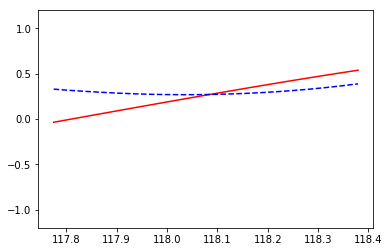

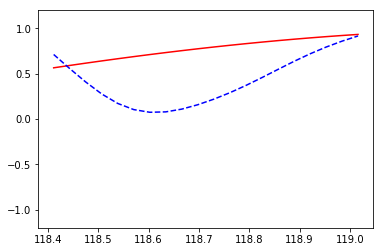

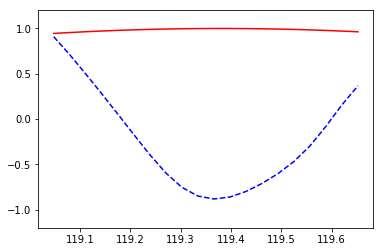

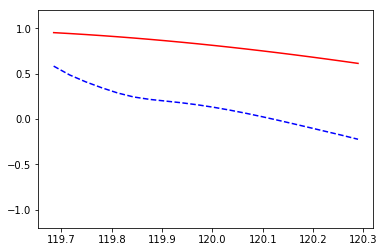

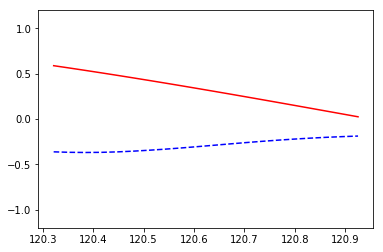

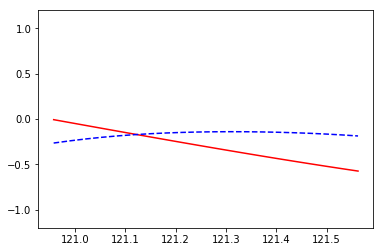

train cost:  0.0738808


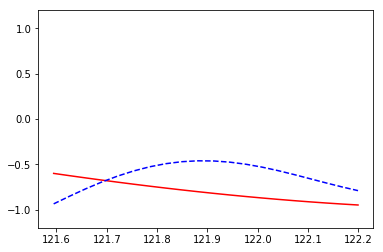

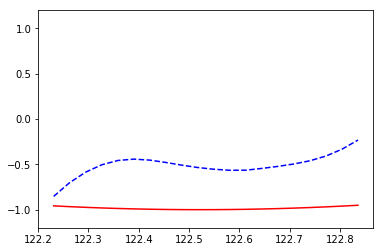

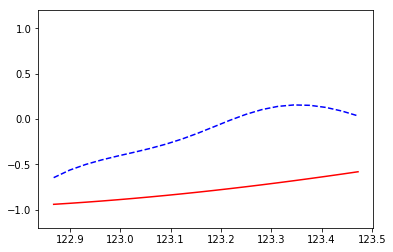

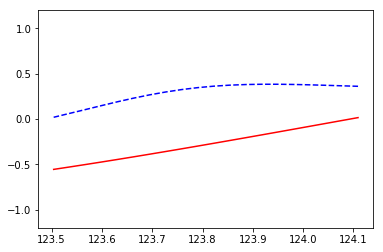

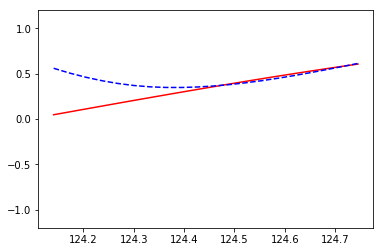

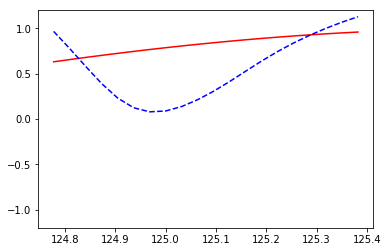

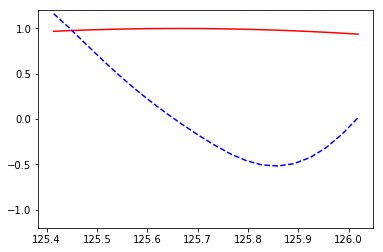

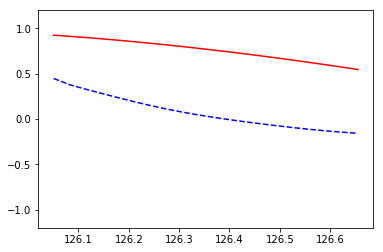

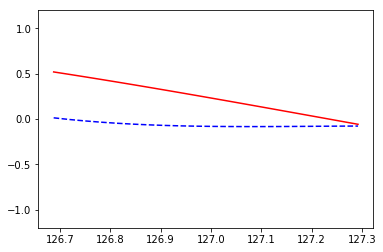

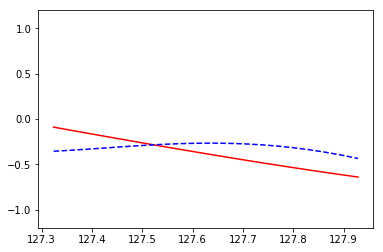

train cost:  0.10614548


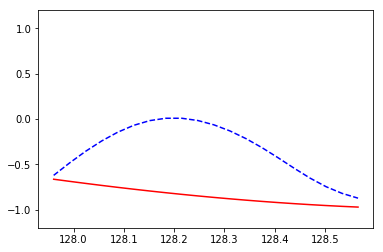

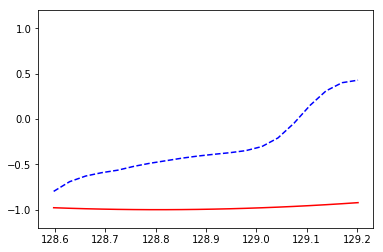

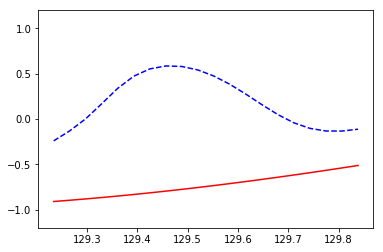

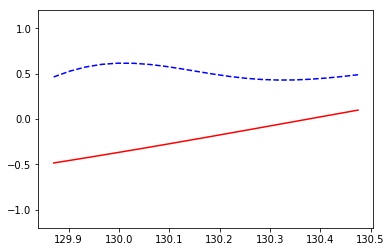

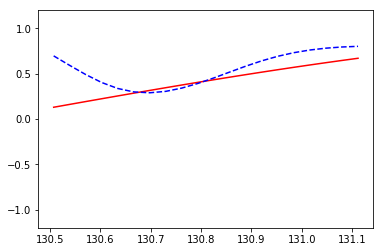

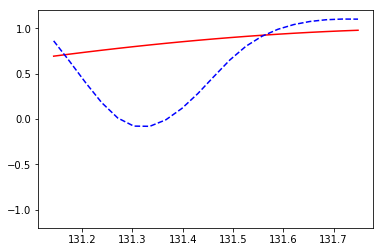

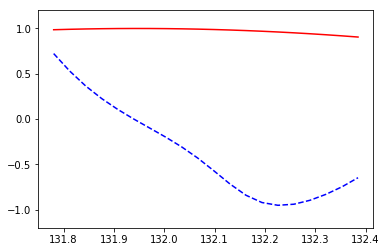

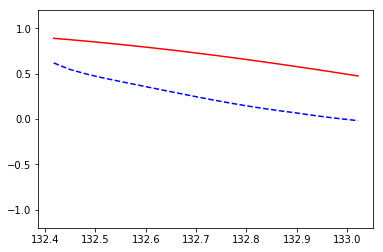

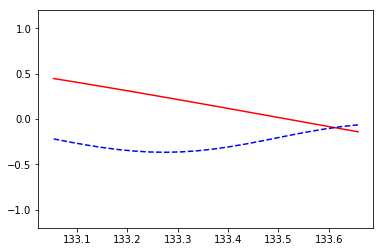

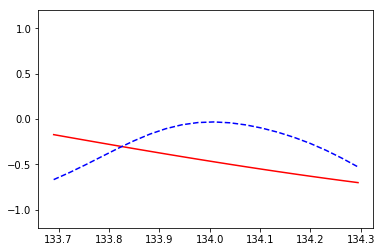

train cost:  0.12321663


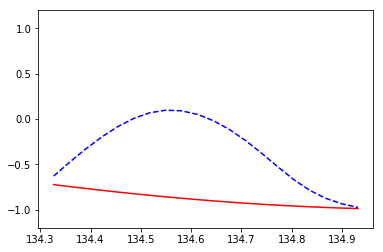

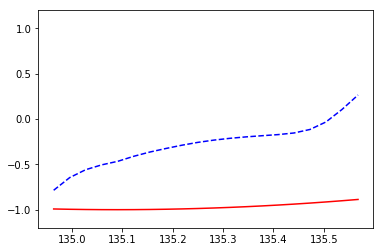

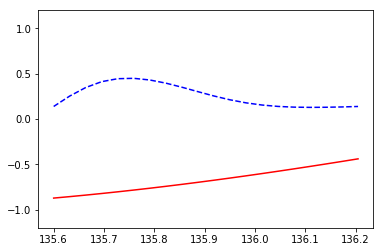

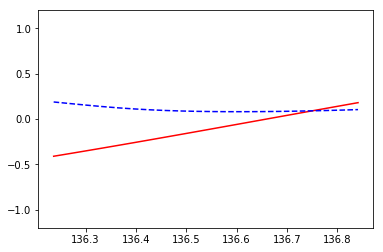

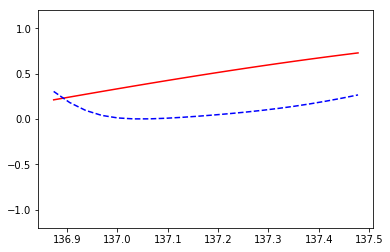

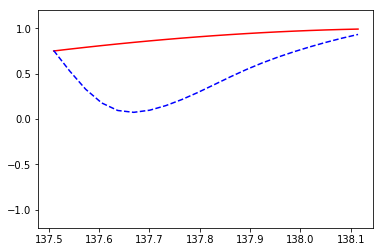

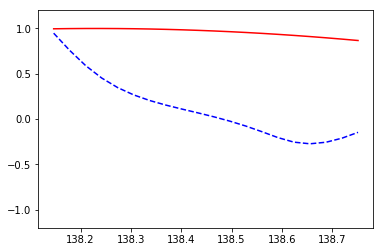

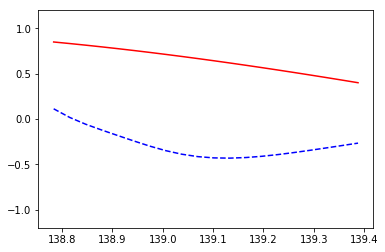

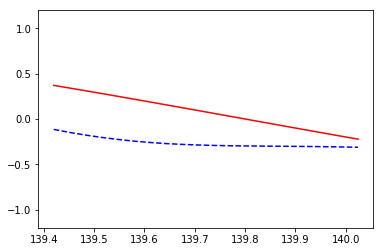

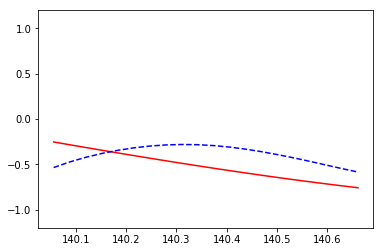

train cost:  0.08004547


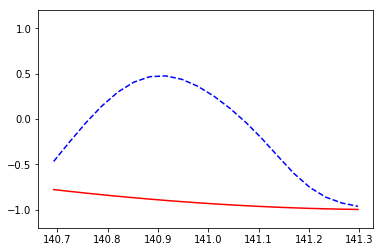

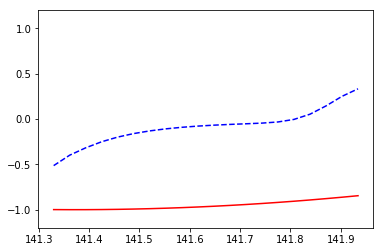

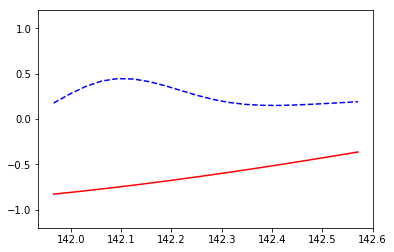

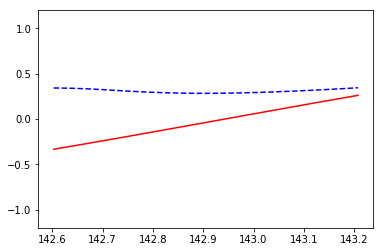

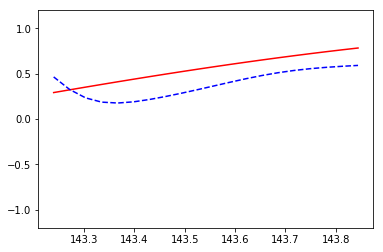

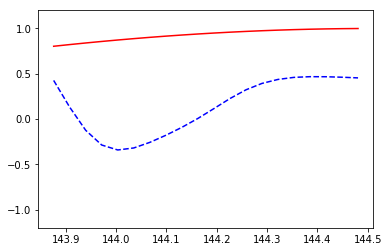

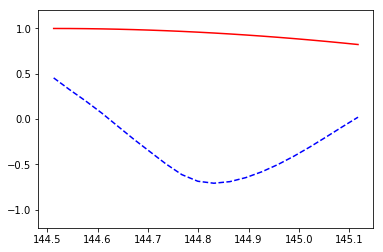

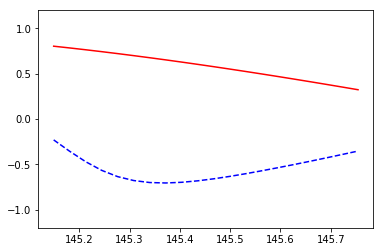

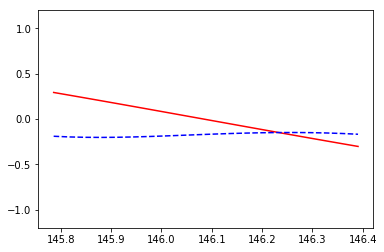

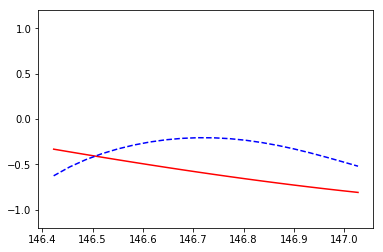

train cost:  0.058201358


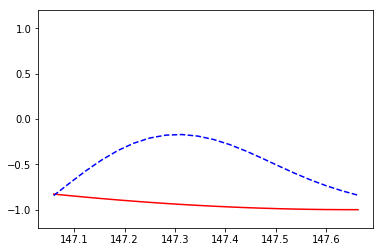

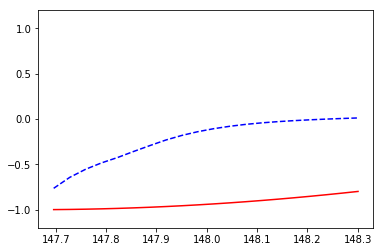

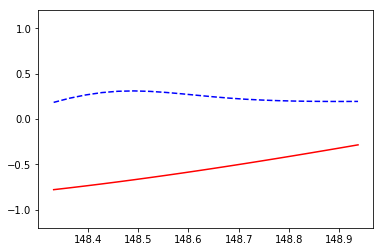

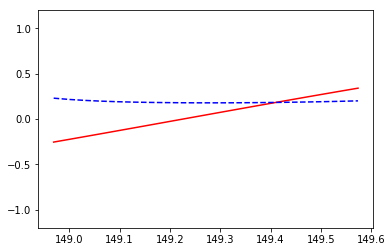

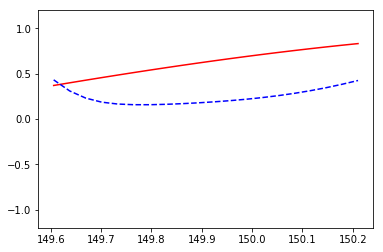

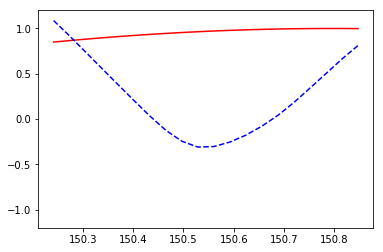

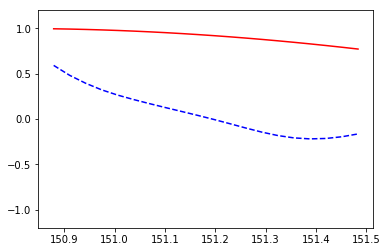

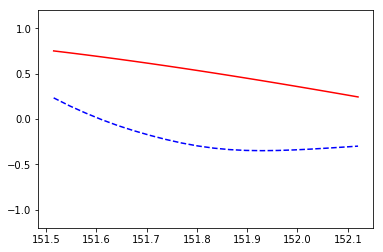

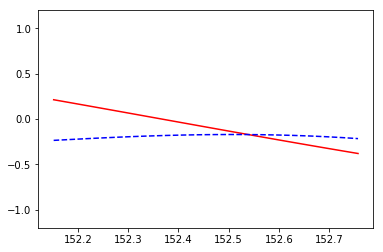

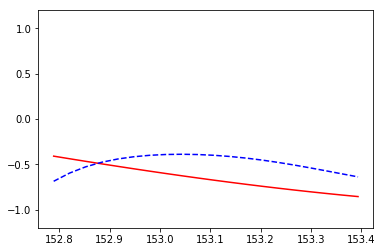

train cost:  0.14176571


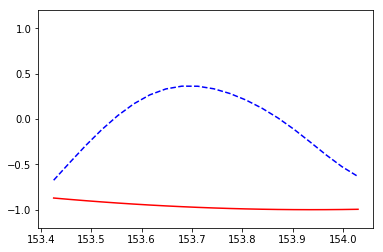

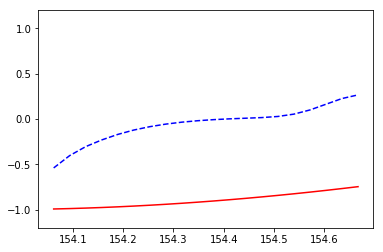

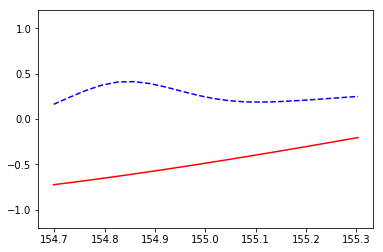

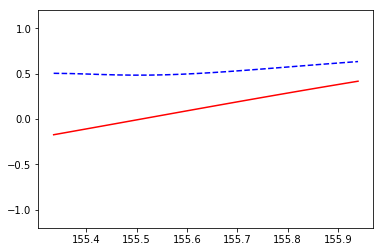

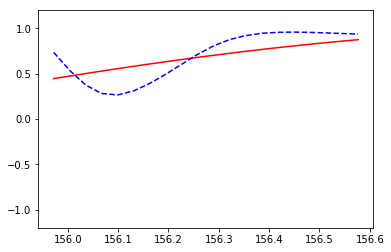

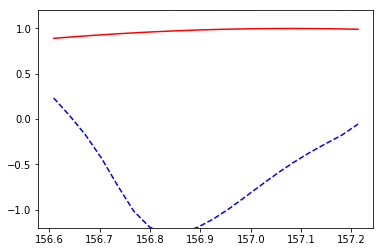

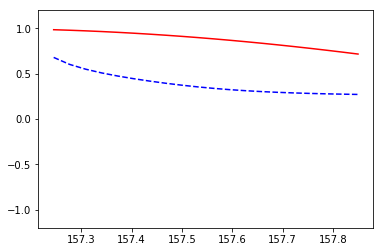

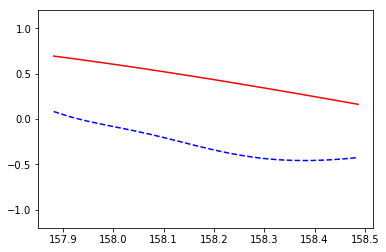

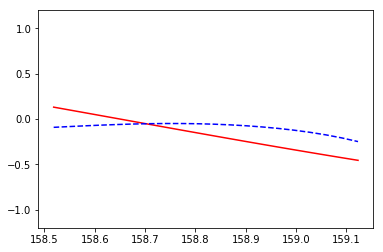

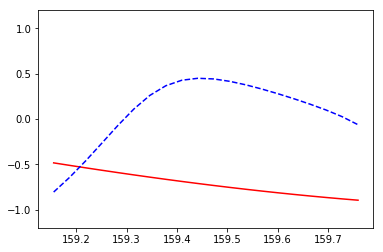

train cost:  0.12946834


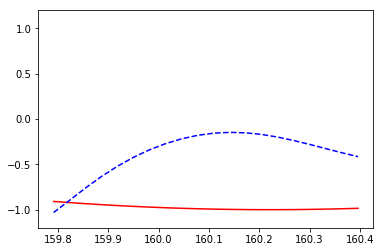

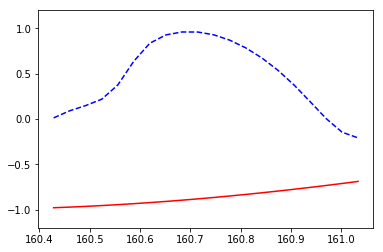

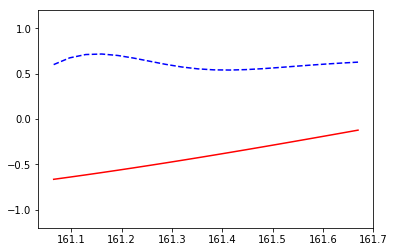

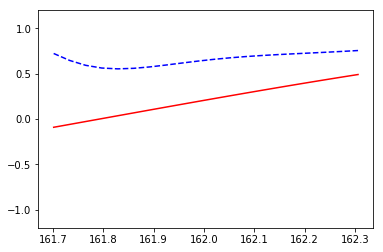

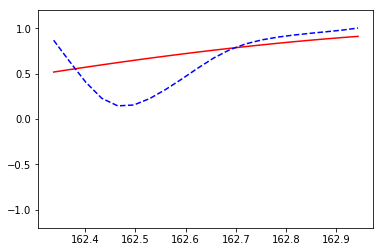

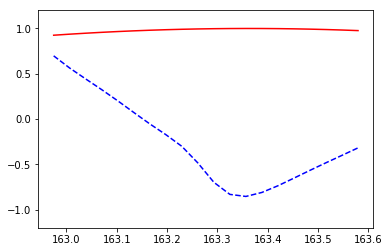

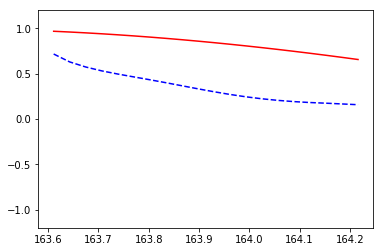

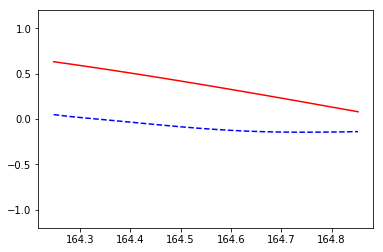

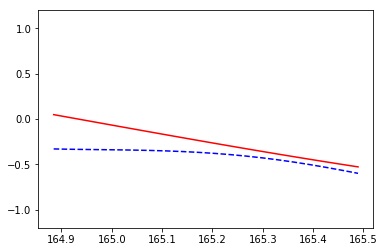

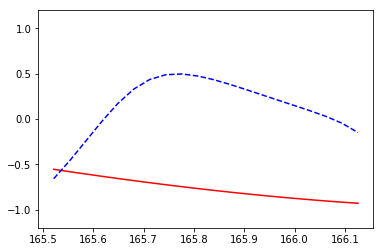

train cost:  0.21428168


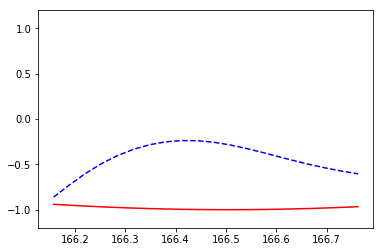

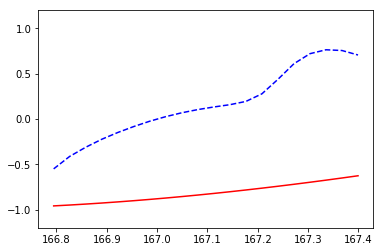

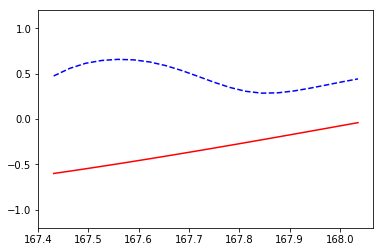

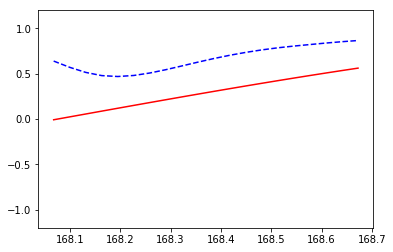

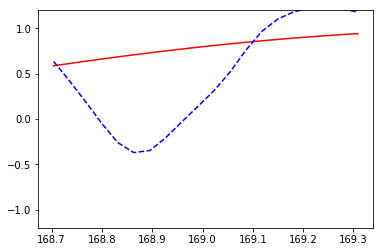

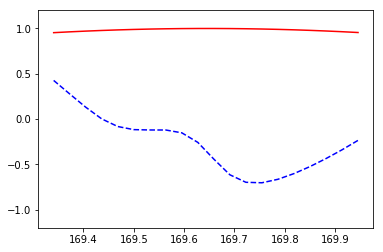

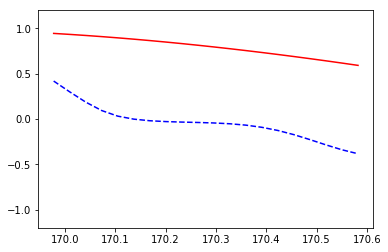

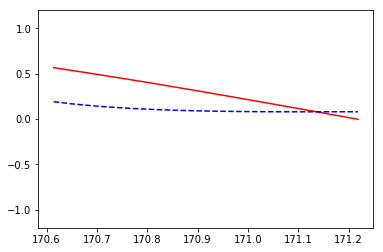

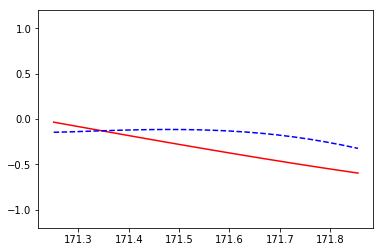

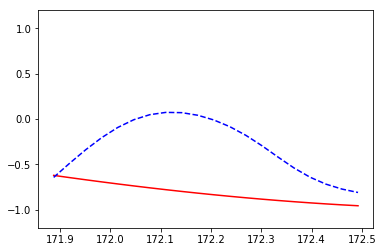

train cost:  0.08475089


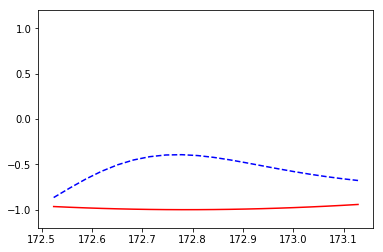

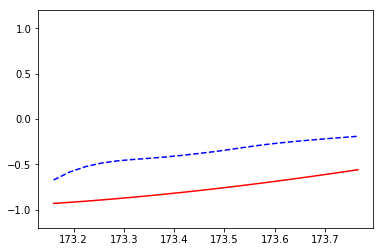

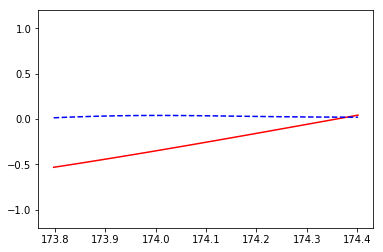

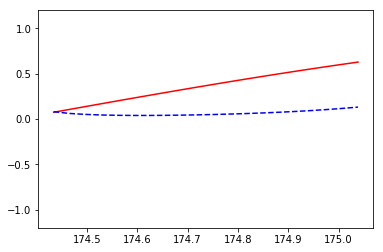

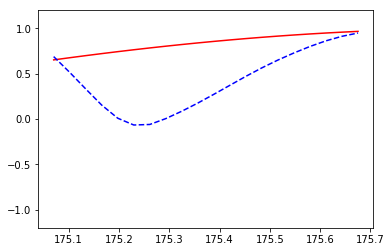

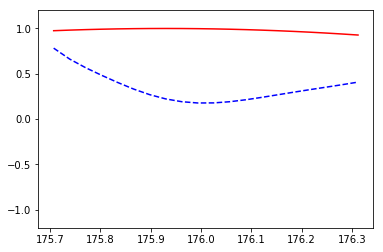

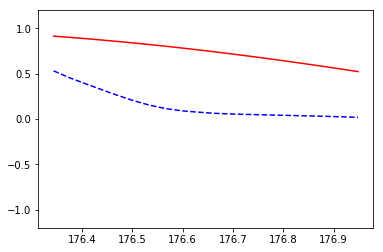

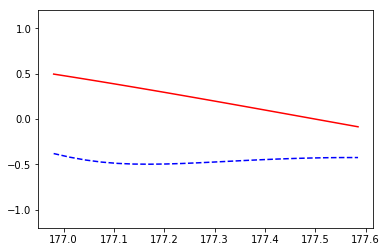

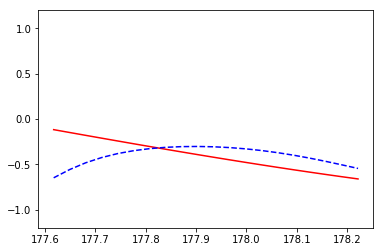

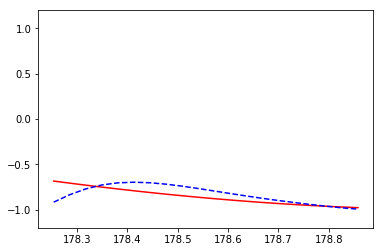

train cost:  0.030410284


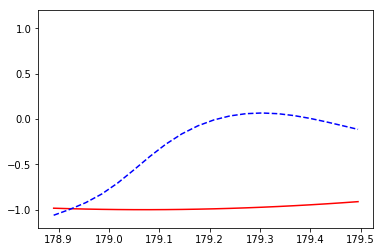

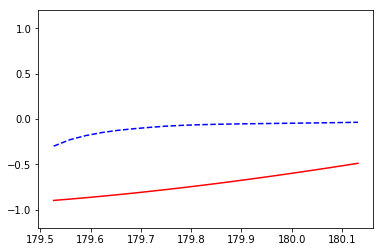

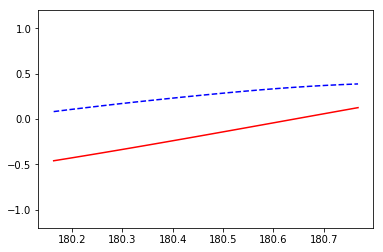

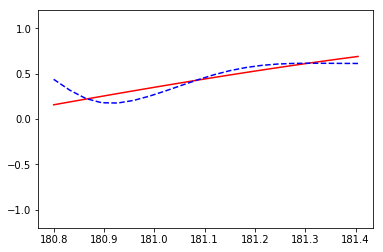

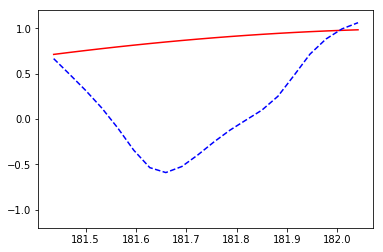

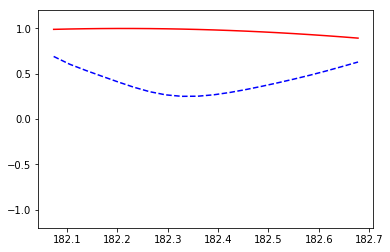

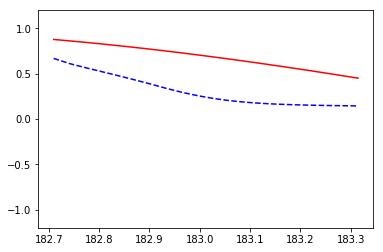

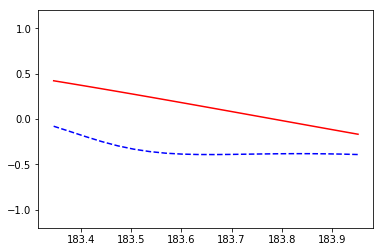

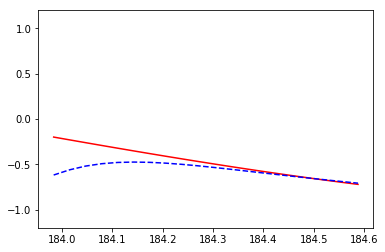

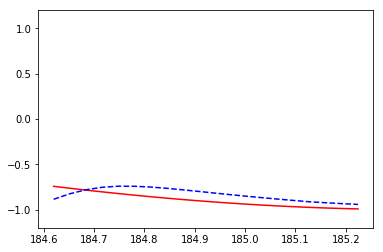

train cost:  0.09883931


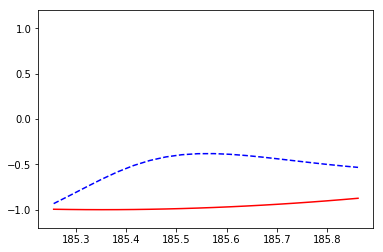

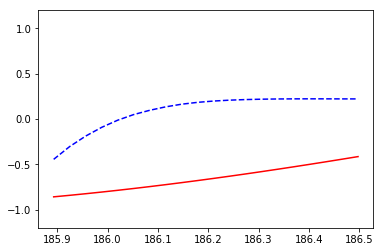

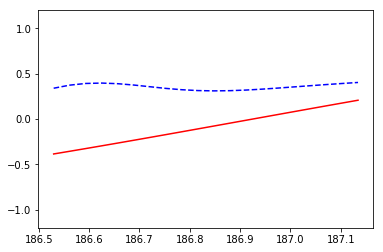

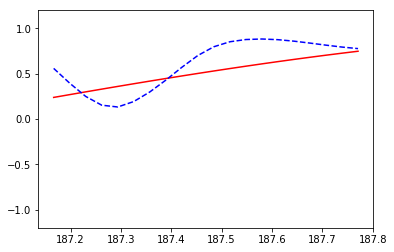

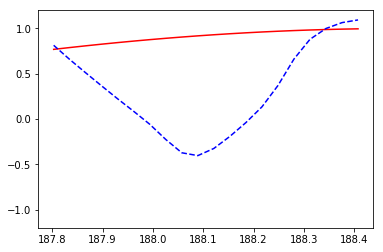

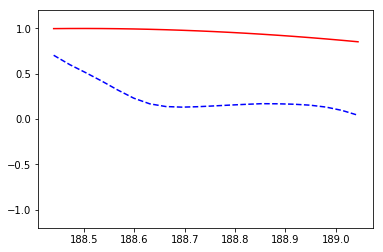

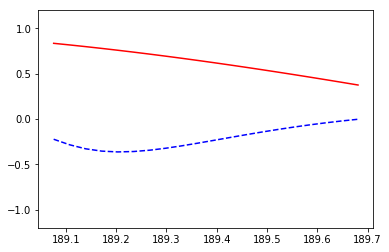

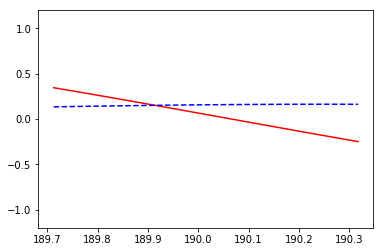

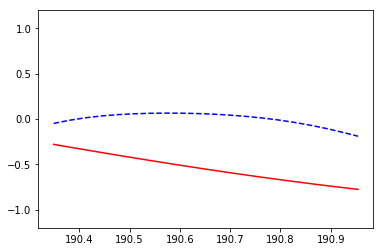

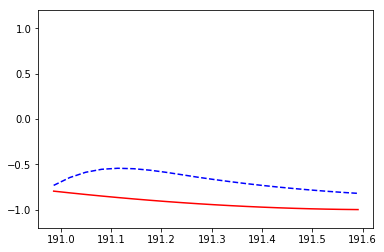

train cost:  0.08767574


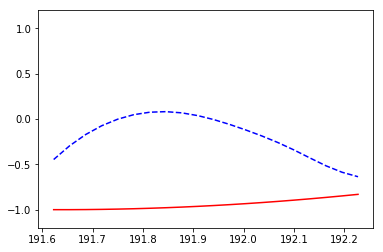

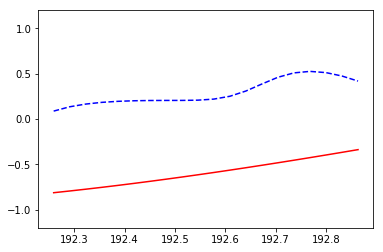

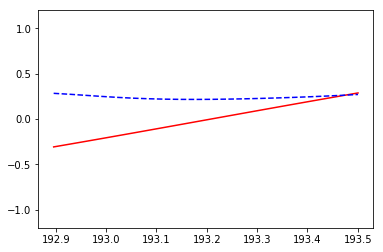

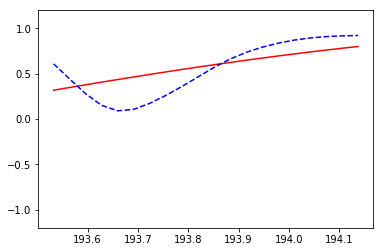

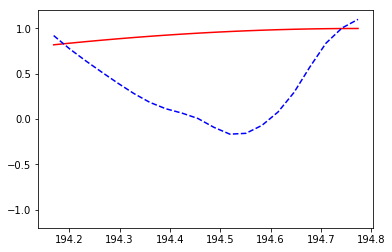

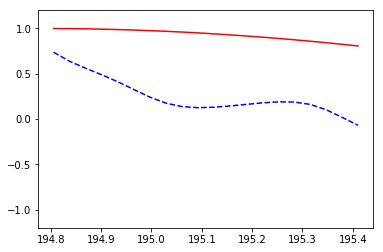

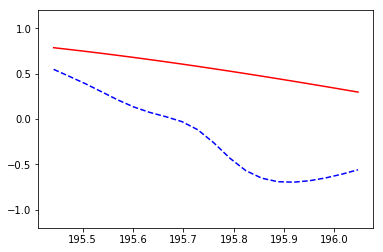

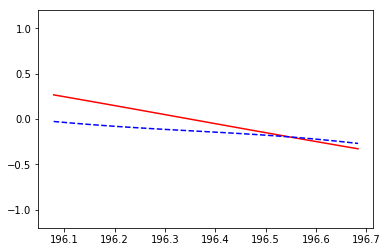

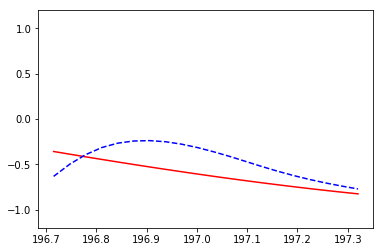

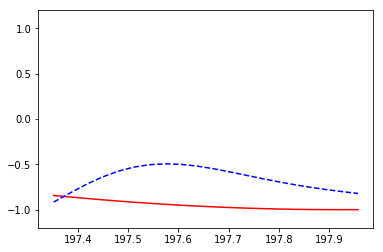

train cost:  0.09540877


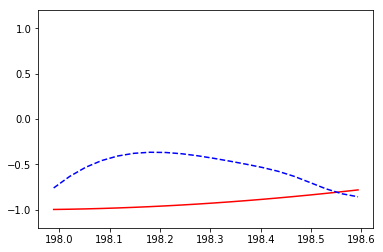

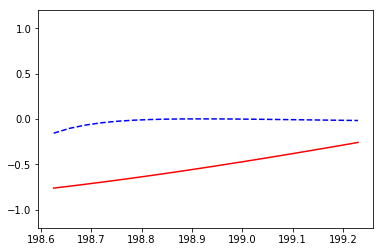

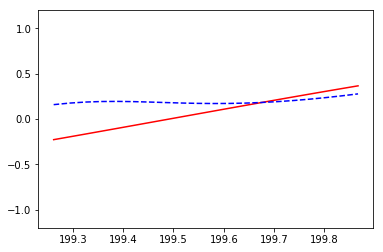

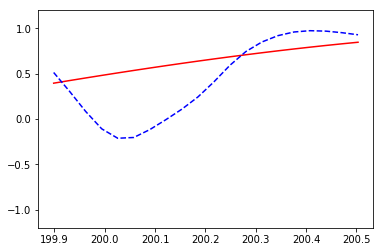

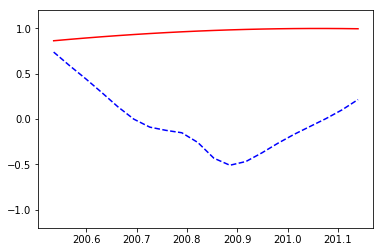

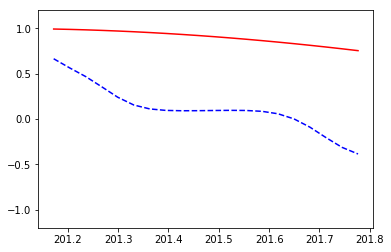

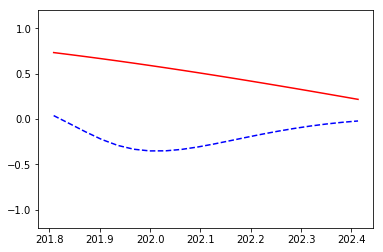

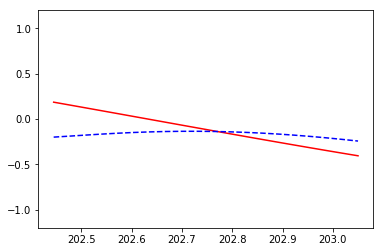

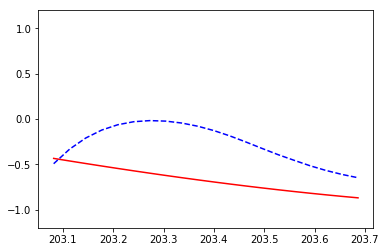

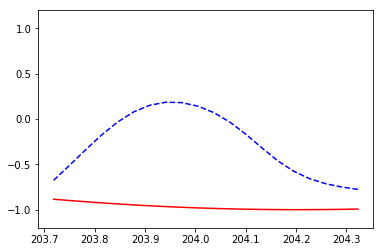

train cost:  0.043222055


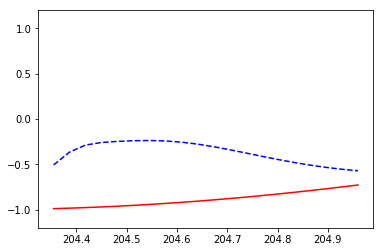

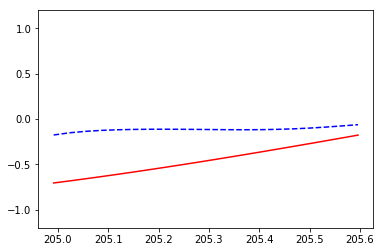

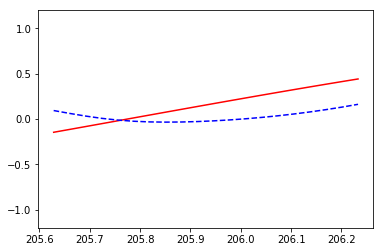

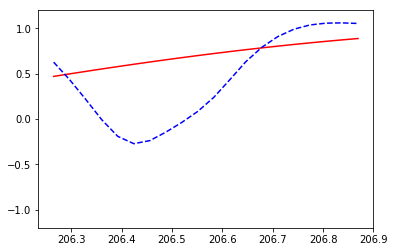

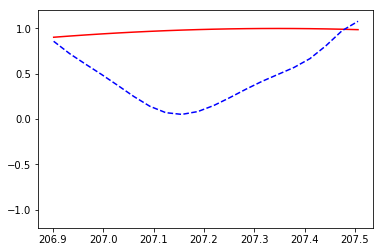

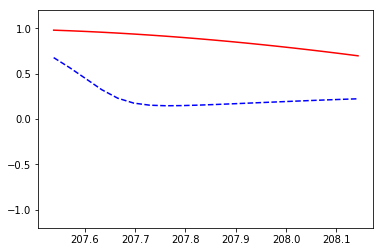

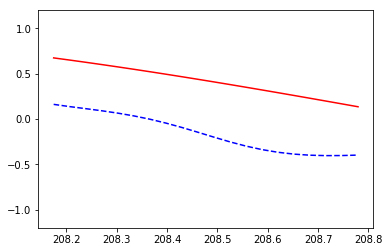

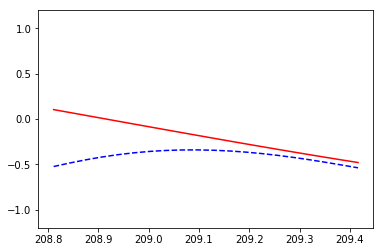

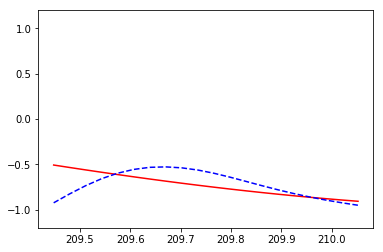

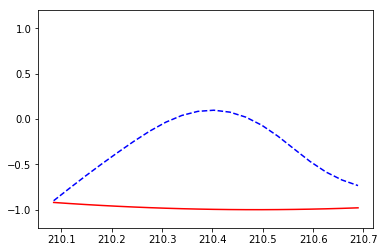

train cost:  0.013567086


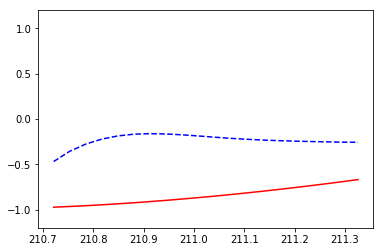

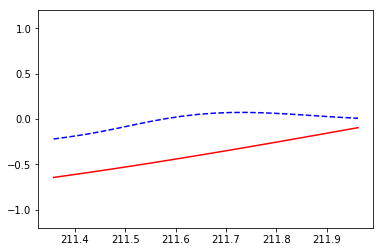

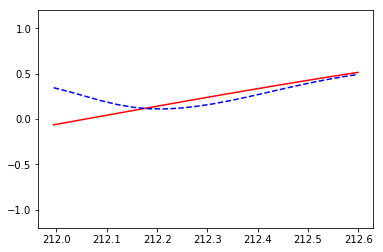

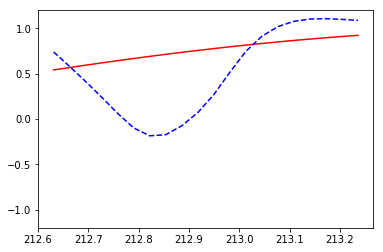

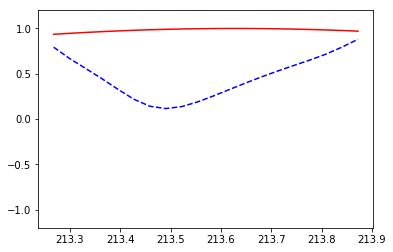

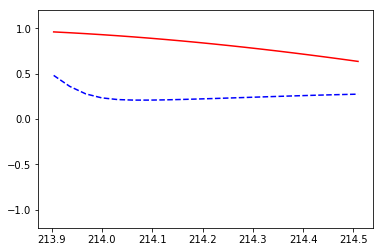

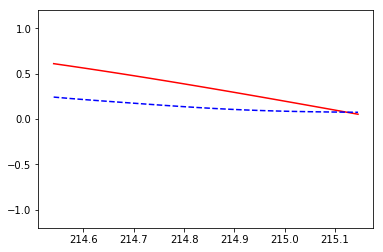

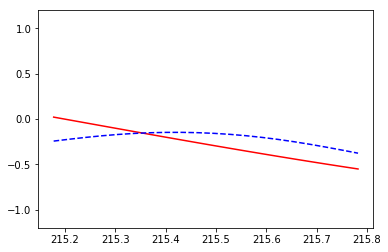

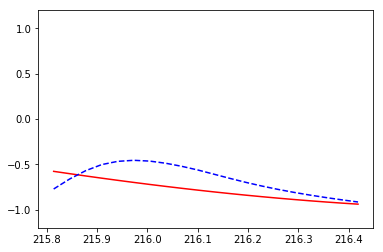

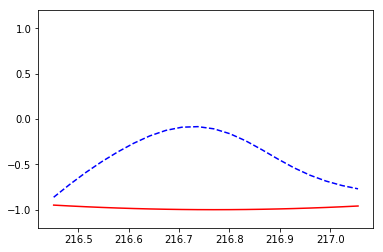

train cost:  0.024998544


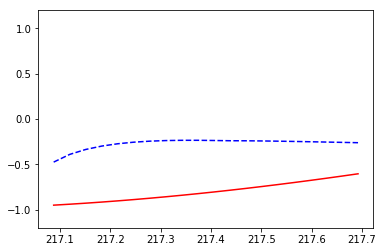

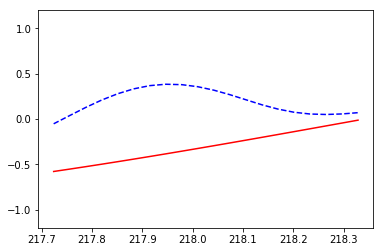

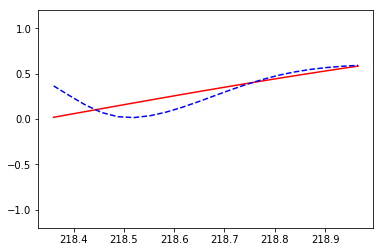

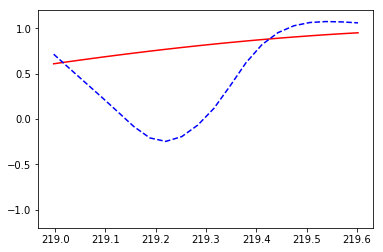

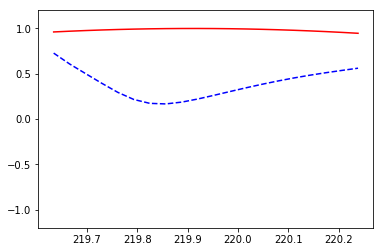

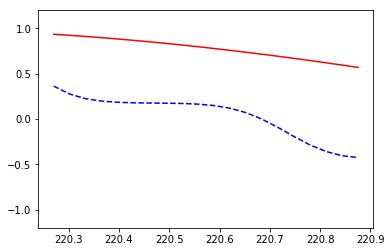

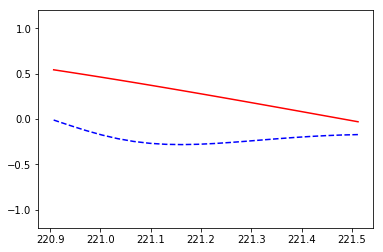

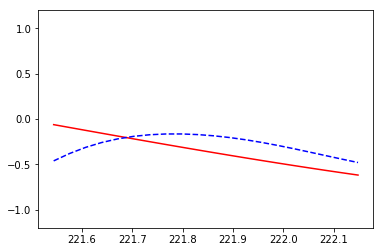

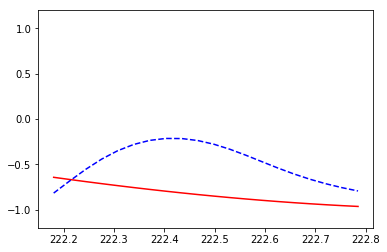

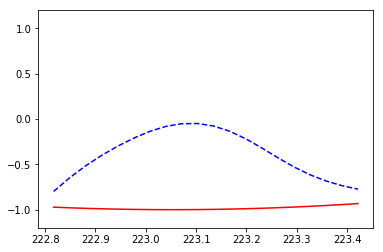

train cost:  0.018474126


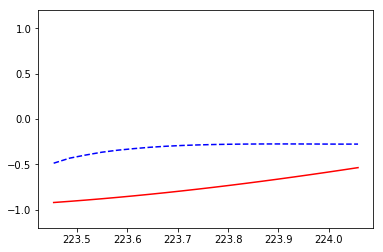

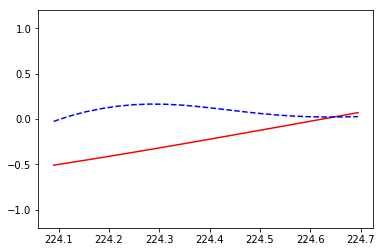

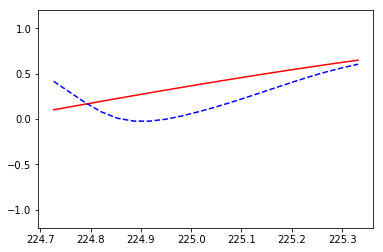

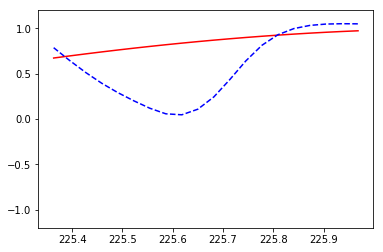

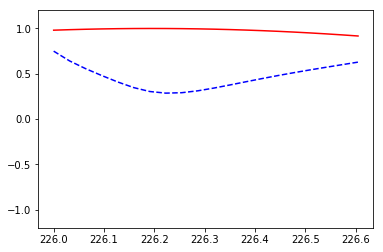

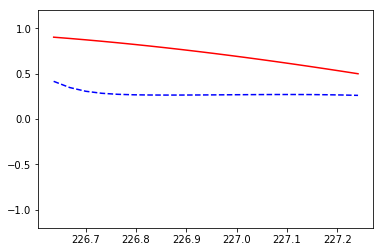

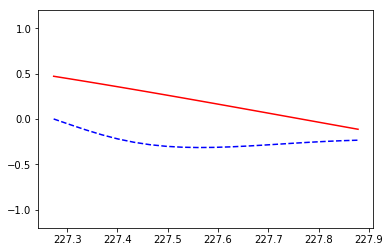

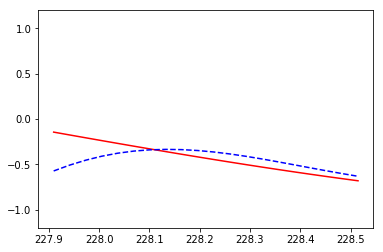

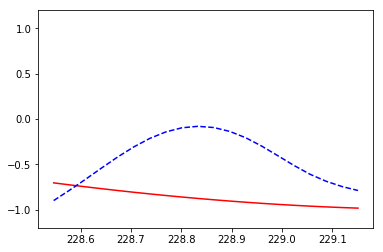

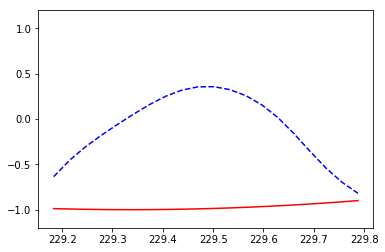

train cost:  0.024939071


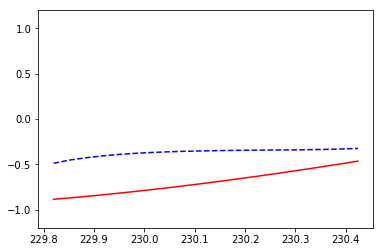

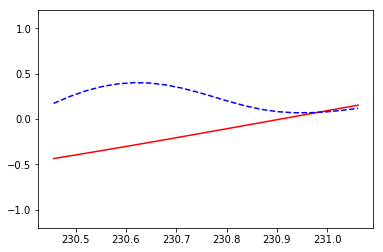

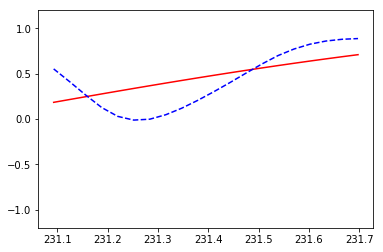

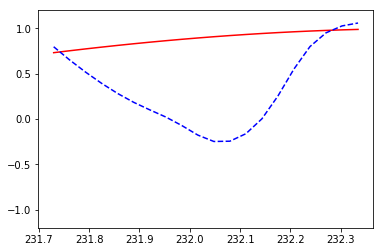

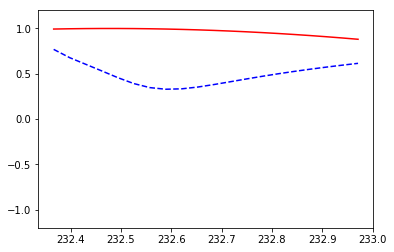

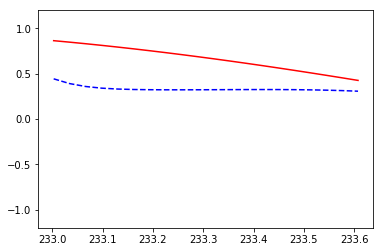

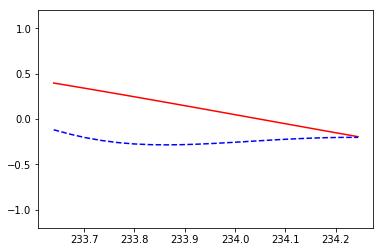

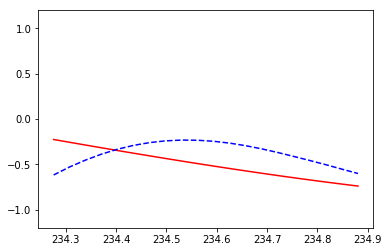

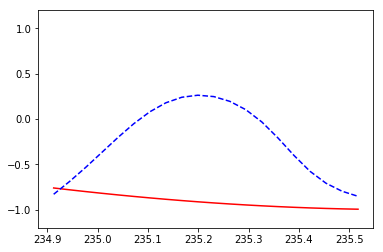

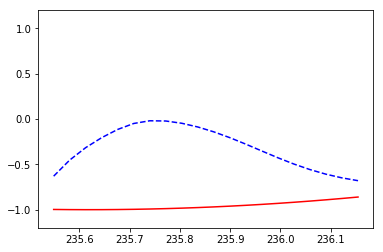

train cost:  0.026598822


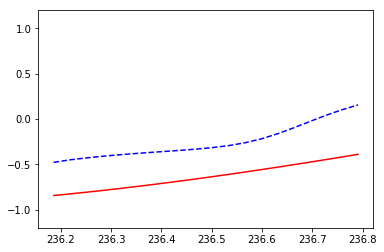

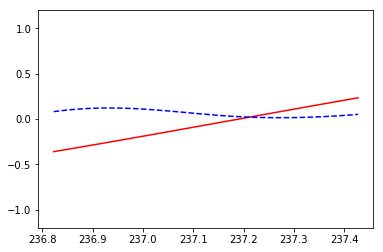

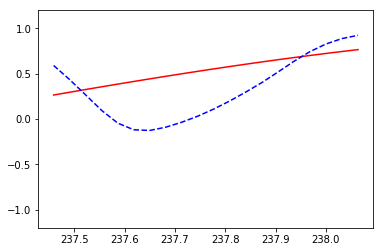

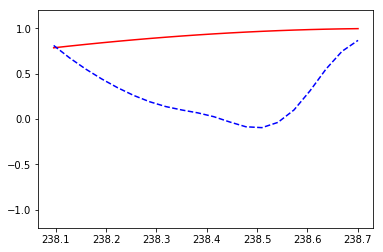

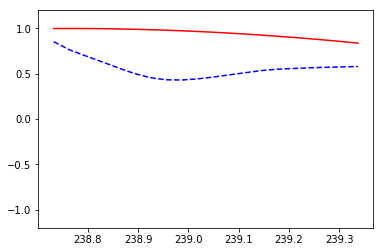

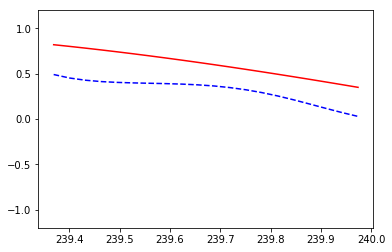

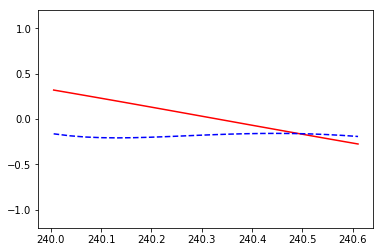

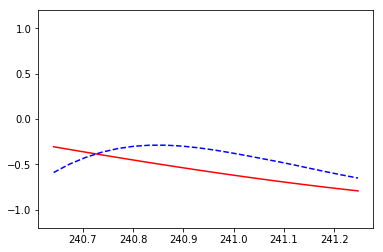

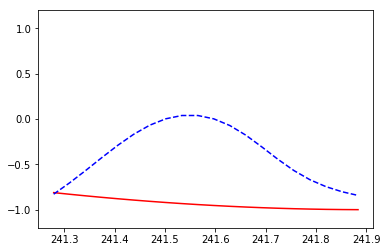

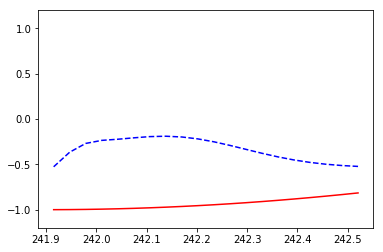

train cost:  0.039999828


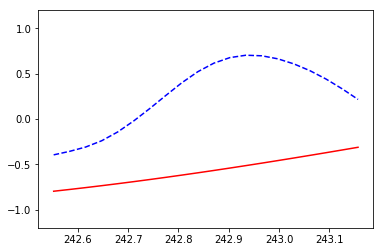

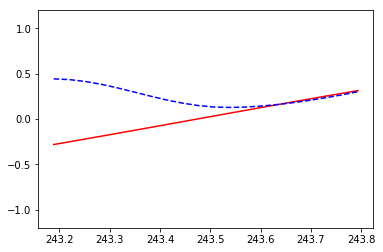

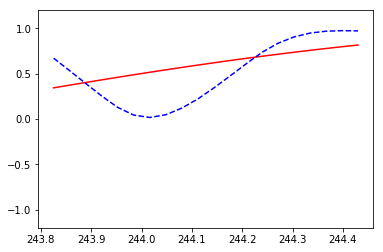

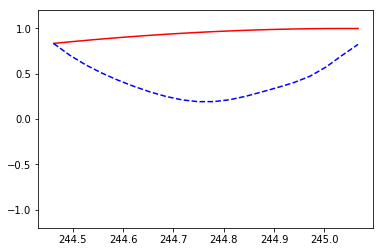

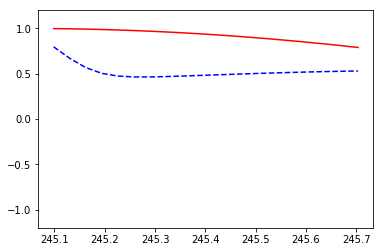

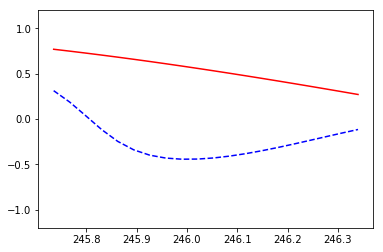

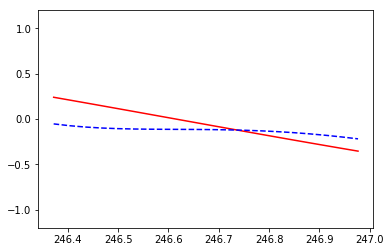

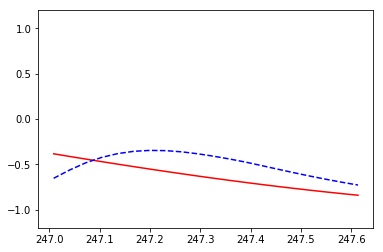

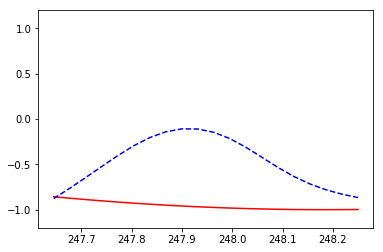

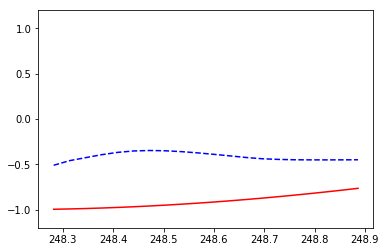

train cost:  0.039908133


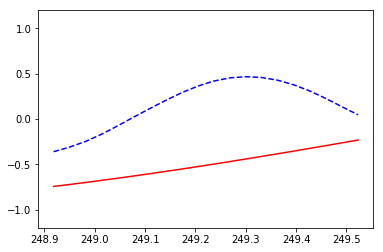

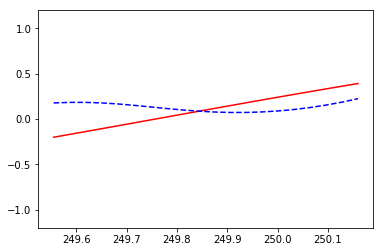

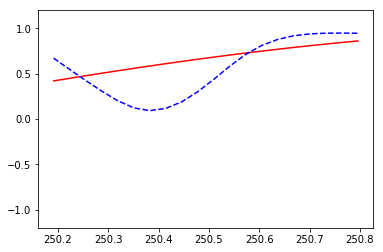

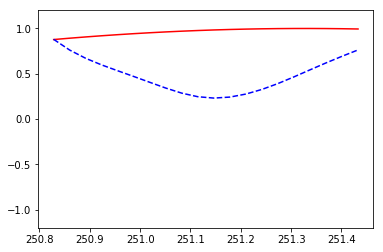

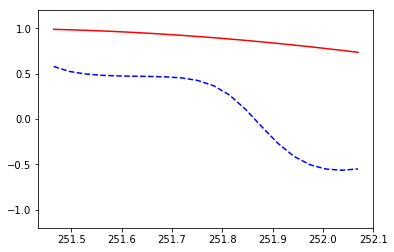

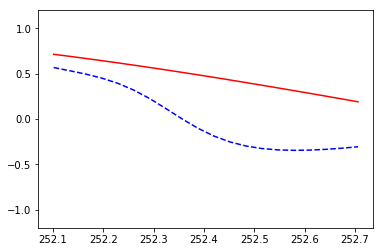

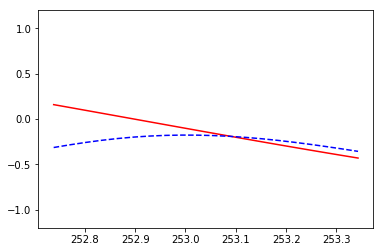

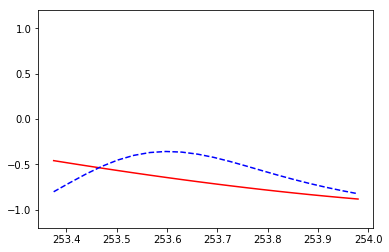

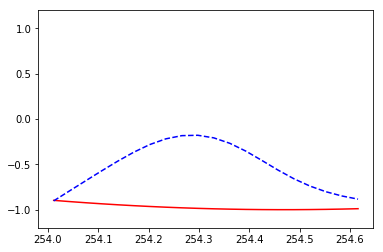

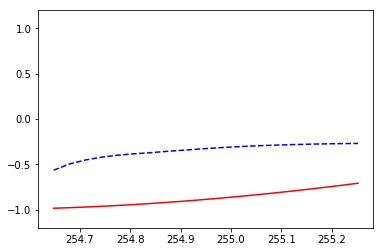

train cost:  0.029508252


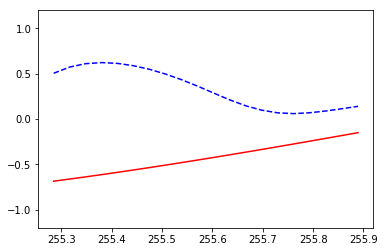

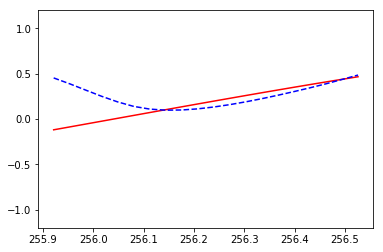

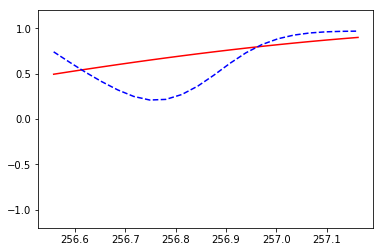

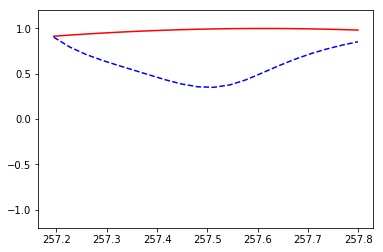

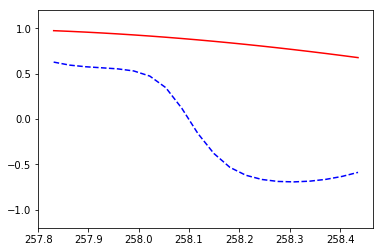

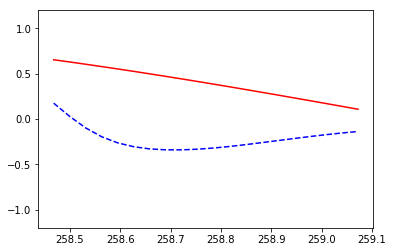

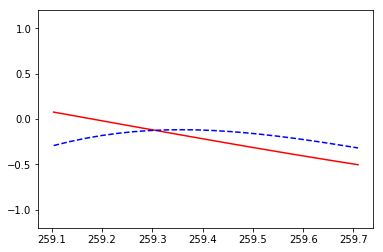

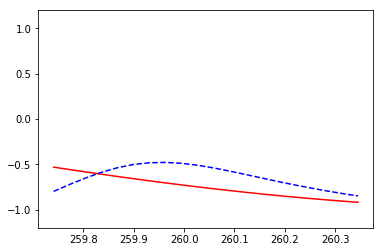

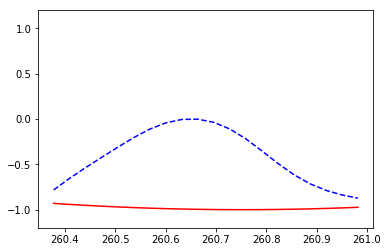

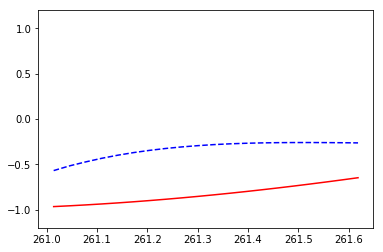

train cost:  0.028899143


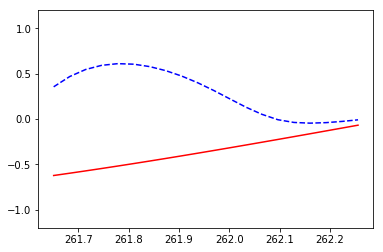

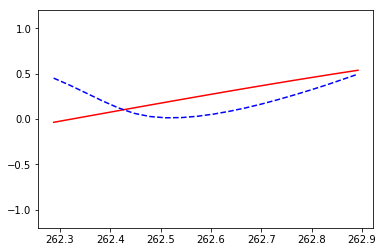

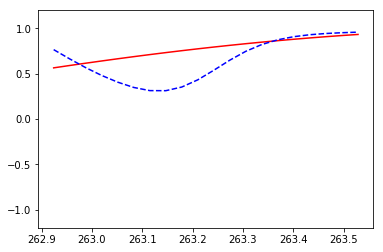

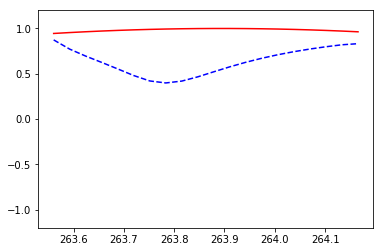

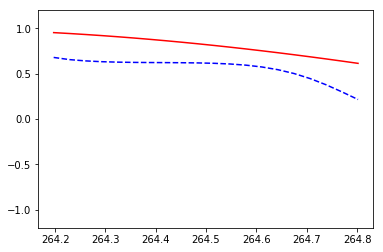

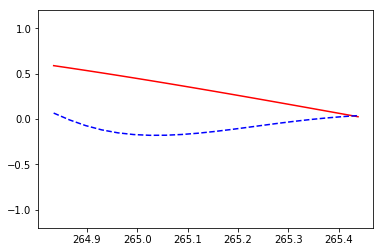

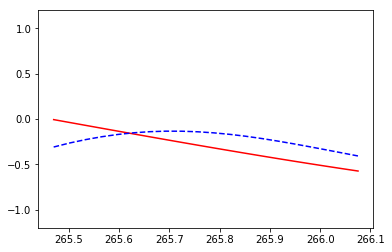

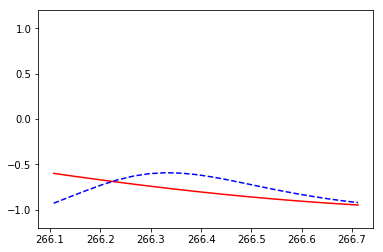

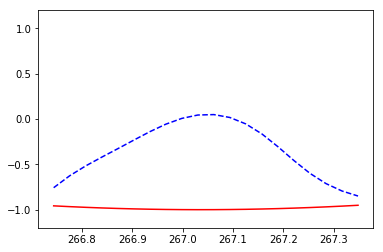

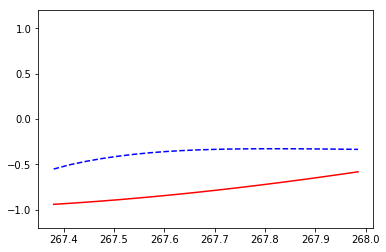

train cost:  0.034836873


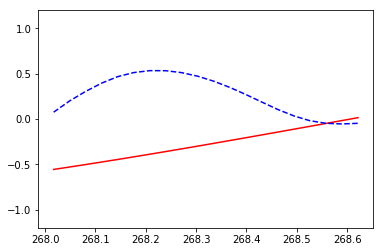

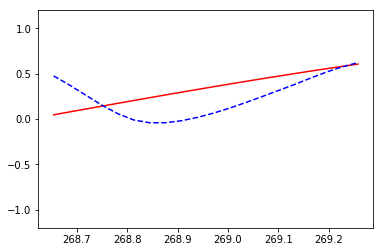

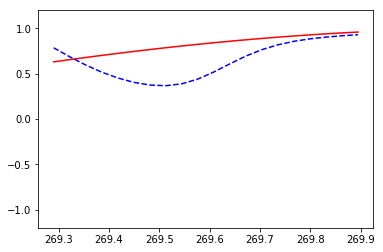

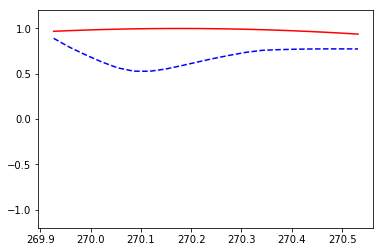

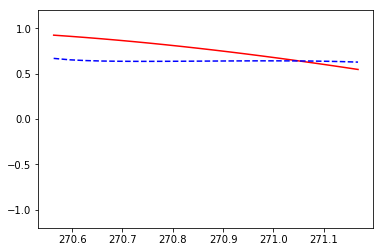

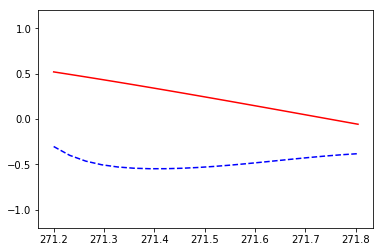

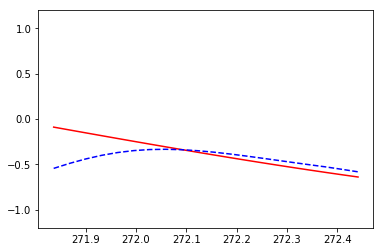

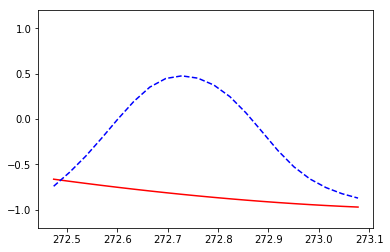

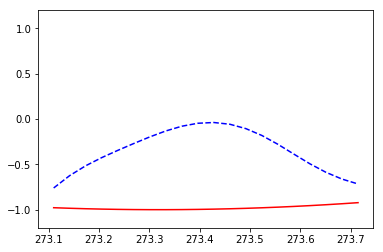

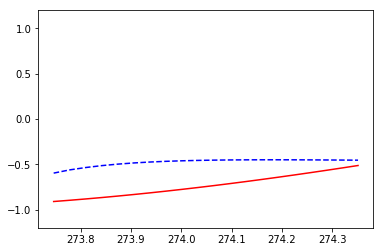

train cost:  0.020723527


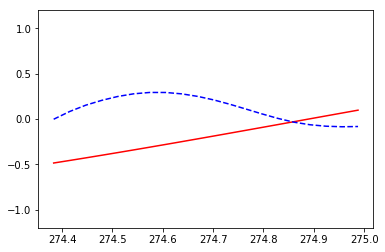

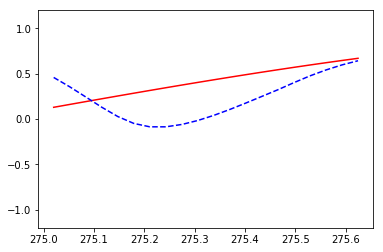

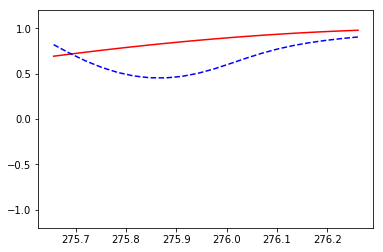

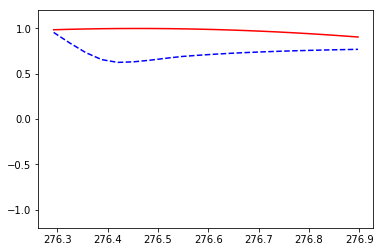

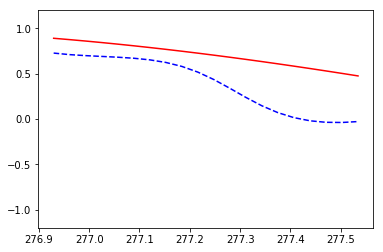

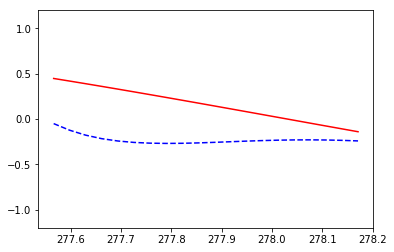

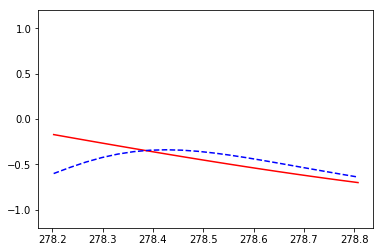

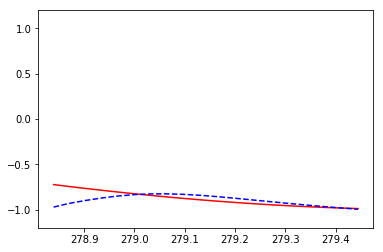

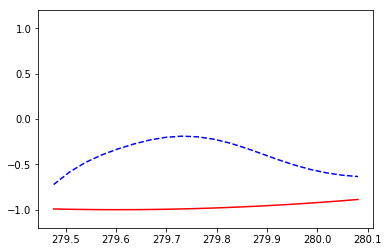

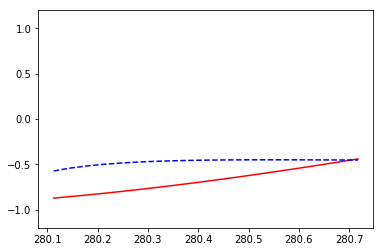

train cost:  0.020497197


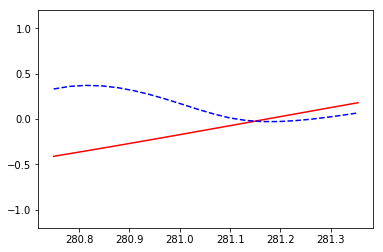

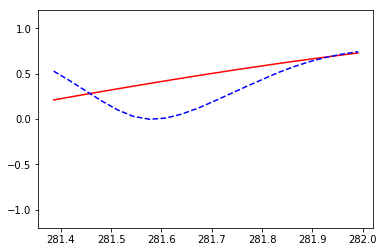

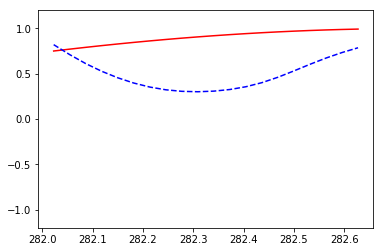

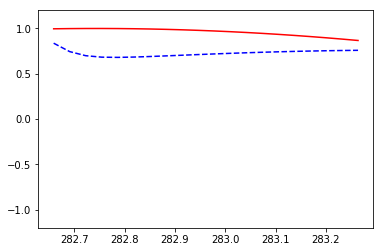

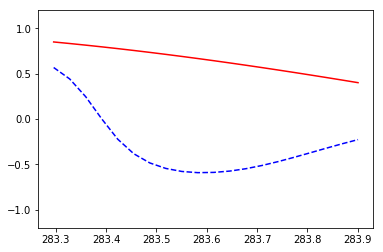

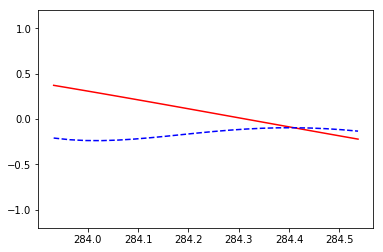

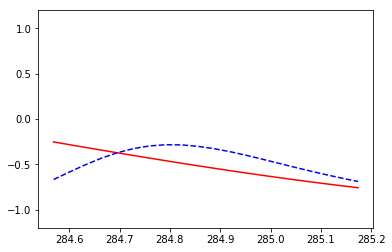

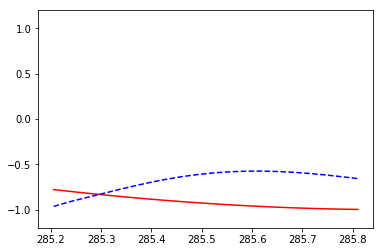

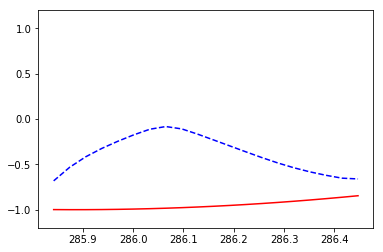

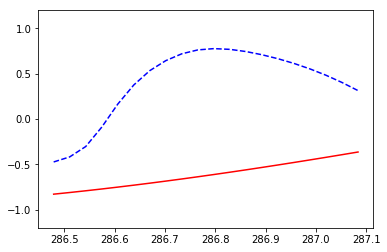

train cost:  0.009121872


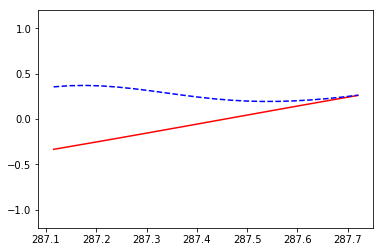

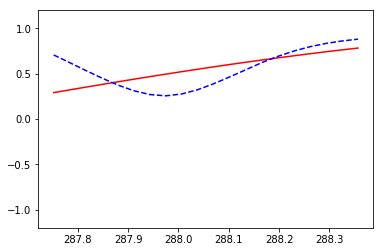

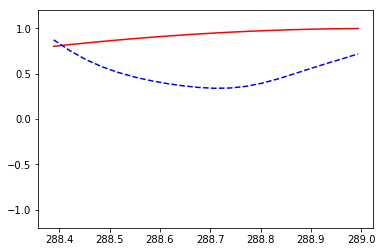

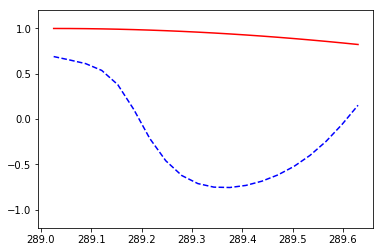

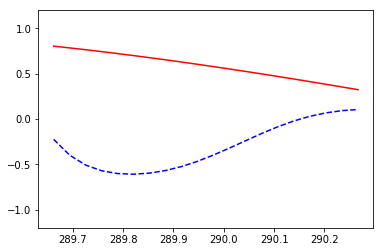

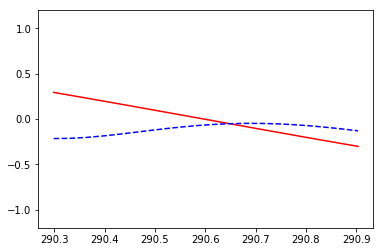

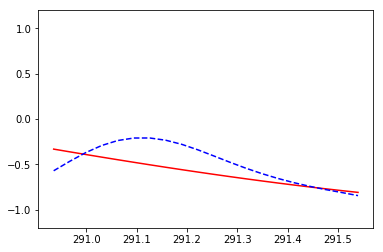

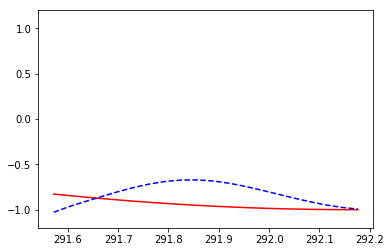

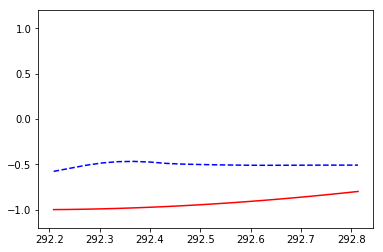

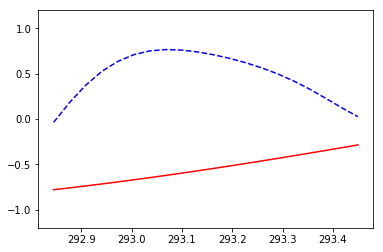

train cost:  0.030816684


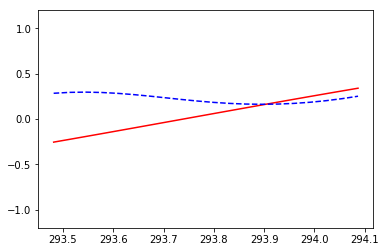

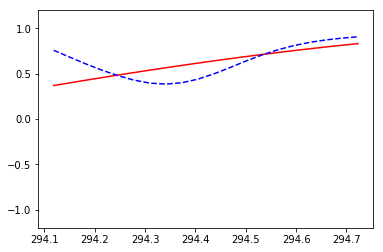

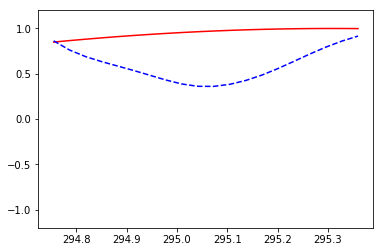

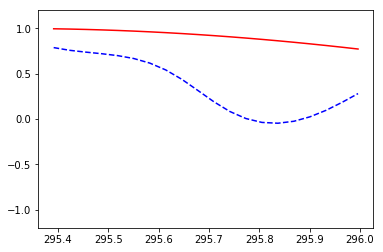

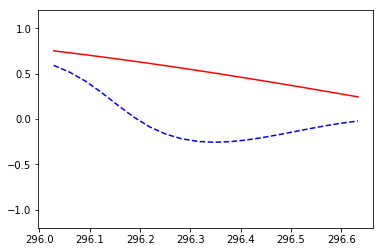

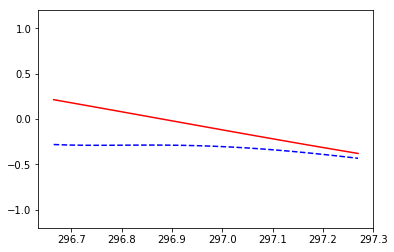

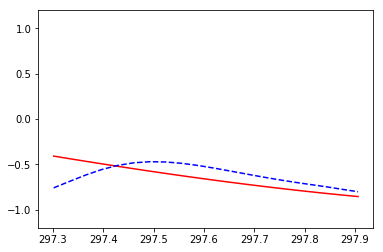

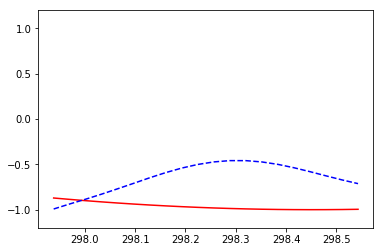

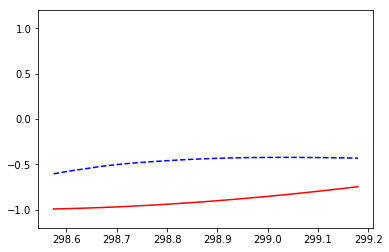

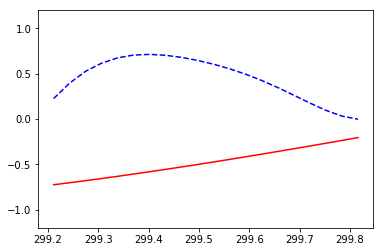

train cost:  0.034176625


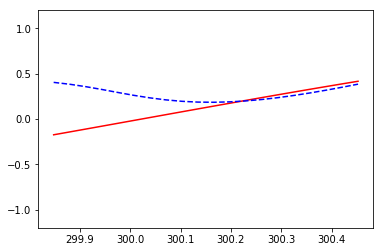

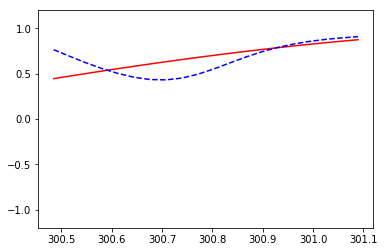

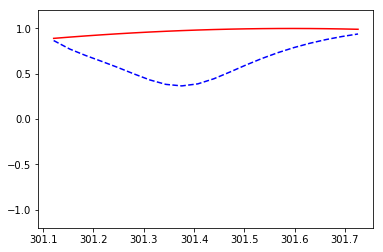

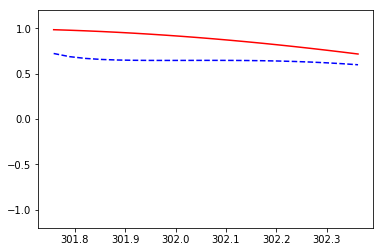

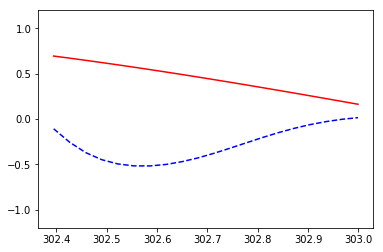

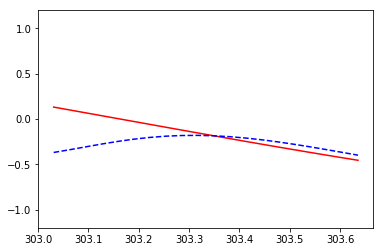

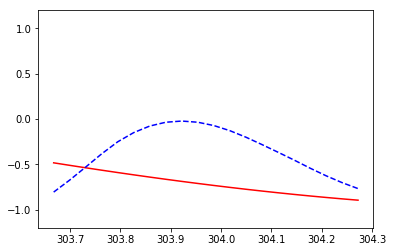

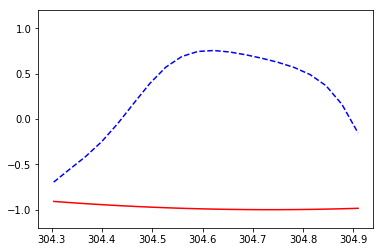

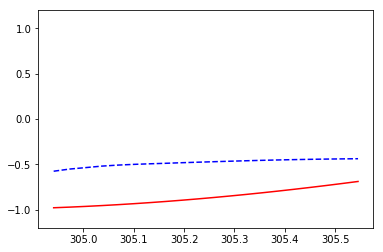

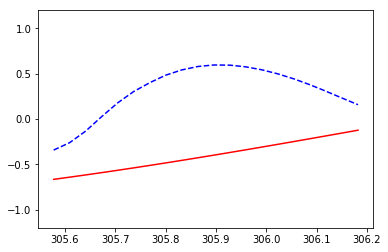

train cost:  0.031349603


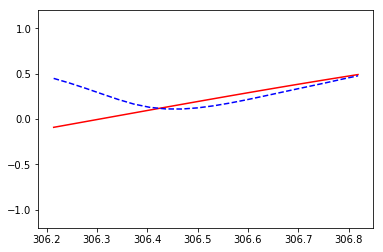

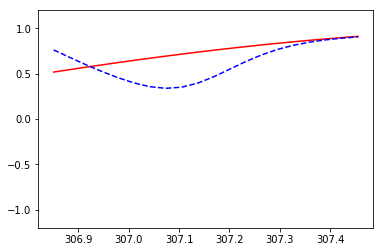

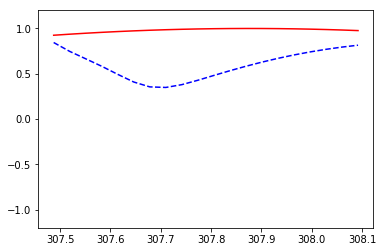

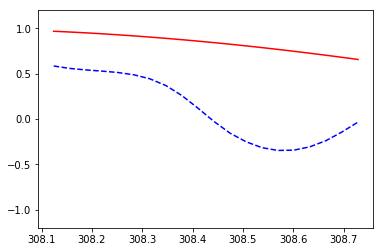

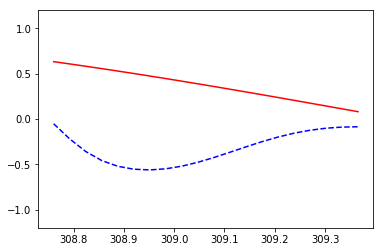

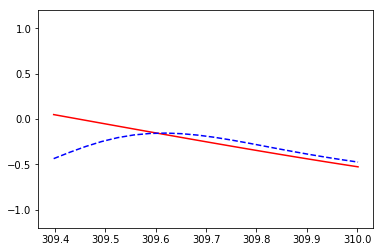

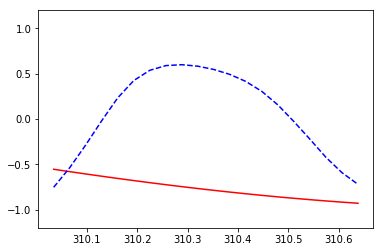

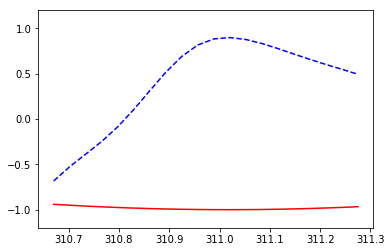

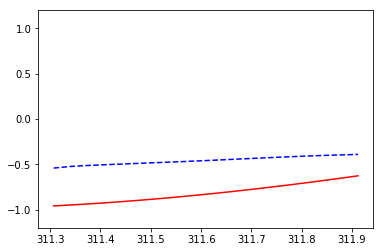

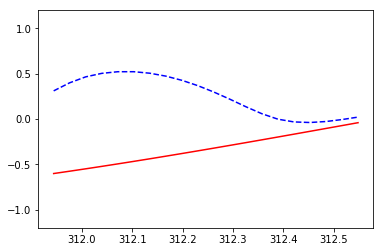

train cost:  0.020009004


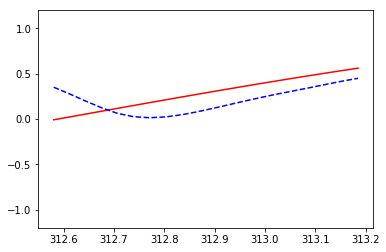

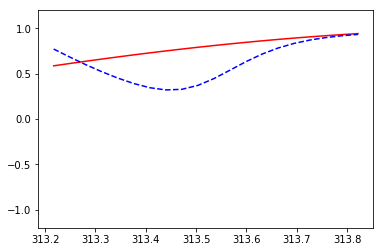

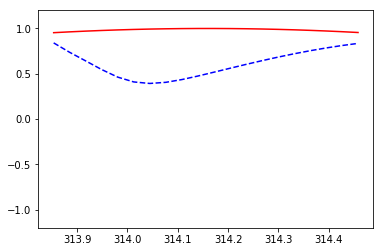

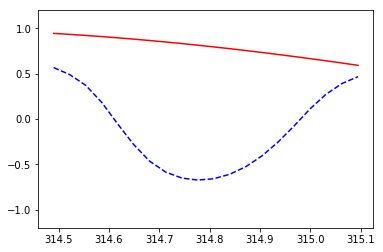

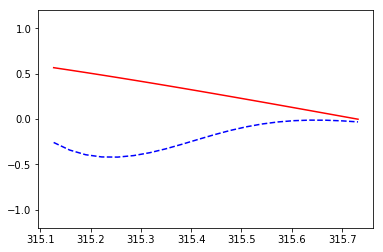

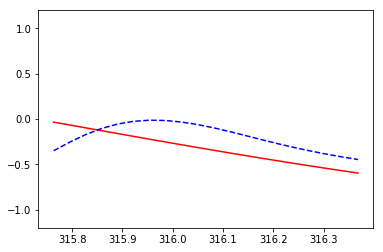

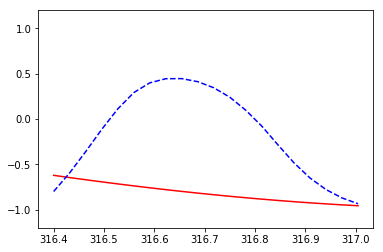

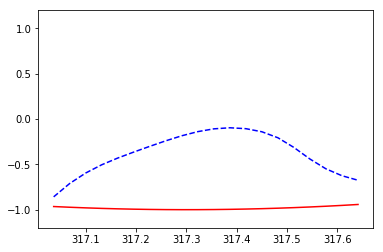

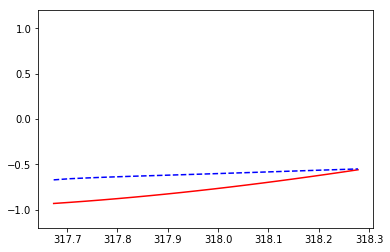

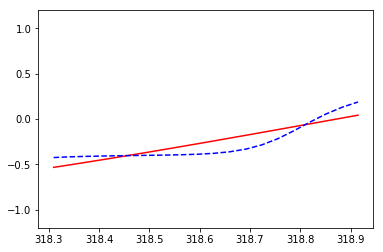

train cost:  0.028342372


In [42]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)

# Autoencoder

In [43]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [44]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()


In [45]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [46]:
# in order to plot in a 2D figure
encoding_dim = 2


In [47]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [48]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)


In [49]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)#注意此处的activation是tanh，之后是（-1，1），之前原始数据通过normalization变为(-0.5,0.5)

In [50]:
# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)
#autoencoder包含encoder layers和decoder layers层

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [51]:
# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)
#encoder包括encoder layers层

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [52]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [53]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)


Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0692
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0546
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0502
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0478
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0463
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0453
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0445
Epoch 8/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0438
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0431
Epoch 10/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0426
Epoch 11/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0421
Epoch 12/20
60000/60000 [===========================

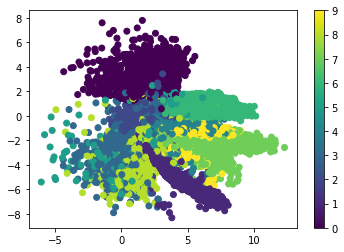

In [54]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

# save and load

In [62]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
model.compile(loss='mse', optimizer='sgd')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  from ipykernel import kernelapp as app


In [63]:
# save

print('test before save: ', model.predict(X_test[0:2]))
model.save('my_model.h5')   # HDF5 file, you have to pip3 install h5py if don't have it

test before save:  [[1.8832371]
 [2.1850314]]


ImportError: `save_model` requires h5py.

In [58]:
del model  # deletes the existing model

In [59]:
# load
model = load_model('my_model.h5')
print('test after load: ', model.predict(X_test[0:2]))

ImportError: `load_model` requires h5py.

In [60]:
"""
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')
# save and load fresh network without trained weights
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)
"""

"\n# save and load weights\nmodel.save_weights('my_model_weights.h5')\nmodel.load_weights('my_model_weights.h5')\n# save and load fresh network without trained weights\nfrom keras.models import model_from_json\njson_string = model.to_json()\nmodel = model_from_json(json_string)\n"